# How to download necessary libraries (Only run once per device)

In [ ]:
pip install pyreadstat
pip install pandas
pip install matplotlib
pip intall pyforest

# Importing Libraries and Defining Functions

In [1]:
#Final_loading_code
import os
import pandas as pd
import pyreadstat
import warnings
warnings.filterwarnings('ignore')

def load_files(file_paths, sheet_indices=None, sheet_name=None, return_meta=False):
    """
    Smart loader that handles multiple files and multiple sheets inside Excel files.
    
    Parameters:
    - file_paths (str or list): Single file path or list of file paths.
    - sheet_indices (list of int, optional): For Excel files, indices of sheets to load separately.
    - sheet_name (str/int, optional): Specific sheet to load from Excel (if only one).
    - return_meta (bool): Return (DataFrame, metadata) tuple for .sav files if True.

    Returns:
    - list: List of DataFrames or list of (DataFrame, metadata) tuples.
    """
    
    if isinstance(file_paths, str):
        file_paths = [file_paths]  # make it a list for consistency
    
    loaded_data = []
    
    for file_path in file_paths:
        if not os.path.exists(file_path):
            print(f"Error: File not found -> {file_path}")
            loaded_data.append((None, None) if return_meta else None)
            continue

        file_extension = os.path.splitext(file_path)[-1].lower()
        
        try:
            if file_extension == ".sav":
                df, meta = pyreadstat.read_sav(file_path)
                print(f"Loaded SPSS file: {file_path}")
                loaded_data.append((df, meta) if return_meta else df)
            
            elif file_extension == ".csv":
                df = pd.read_csv(file_path)
                print(f"Loaded CSV file: {file_path}")
                loaded_data.append((df, None) if return_meta else df)
            
            elif file_extension in [".xls", ".xlsx"]:
                excel_file = pd.ExcelFile(file_path)
                sheet_names = excel_file.sheet_names
                
                if sheet_indices is not None:
                    for idx in sheet_indices:
                        if idx < len(sheet_names):
                            df = excel_file.parse(sheet_name=sheet_names[idx])
                            print(f"Loaded sheet '{sheet_names[idx]}' from {file_path}")
                            loaded_data.append((df, None) if return_meta else df)
                        else:
                            print(f"Warning: Sheet index {idx} out of range in {file_path}")
                            loaded_data.append((None, None) if return_meta else None)

                elif sheet_name is not None:
                    df = pd.read_excel(file_path, sheet_name=sheet_name)
                    print(f"Loaded sheet '{sheet_name}' from {file_path}")
                    loaded_data.append((df, None) if return_meta else df)

                else:
                    df = pd.read_excel(file_path, sheet_name=None)
                    print(f"Loaded all sheets from {file_path}")
                    loaded_data.append((df, None) if return_meta else df)

            else:
                print(f"Unsupported file type: {file_extension}")
                loaded_data.append((None, None) if return_meta else None)
        
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            loaded_data.append((None, None) if return_meta else None)
    
    return loaded_data


In [2]:
file_list_1 = ["ALS_Young_2017-18.sav",
             "ALS_Young_2018-19.sav",
             "ALS_Young_2019-20.sav",
]

file_list_2=["ALS_Young_2020-21.sav",
             "ALS_Young_2021-22.sav",
             "ALS_Youn_202223.sav"]

In [3]:
adf1, adf2, adf3= load_files(file_list_1)

Loaded SPSS file: ALS_Young_2017-18.sav
Loaded SPSS file: ALS_Young_2018-19.sav
Loaded SPSS file: ALS_Young_2019-20.sav


In [48]:
adf4, adf5, adf6= load_files(file_list_2)

Loaded SPSS file: ALS_Young_2020-21.sav
Loaded SPSS file: ALS_Young_2021-22.sav
Loaded SPSS file: ALS_Youn_202223.sav


# Basic Pandas Methods

| **No.** | **Command** | **Description** |
|:-------:|:------------|:----------------|
| 1 | `dataset.head(10)` | Returns the first 10 entries of the dataset. |
| 2 | `dataset.tail(10)` | Returns the last 10 entries of the dataset. |
| 3 | `dataset.columns` | Lists all the column names in the dataset as a list. |
| 4 | `dataset['categorical_column'].value_counts()` | Returns the count of each unique category in the specified column. |
| 5 | `dataset['categorical_column'].nunique()` | Returns the number of unique categories in the specified column. |
| 6 | `dataset.to_csv("desired_csv_name.csv")` | Saves the dataset to a CSV file. |


In [ ]:
adf1.head(10)

In [ ]:
adf2.tail(10)

In [ ]:
adf1.columns

In [ ]:
adf1['CSP_name'].value_counts()

In [ ]:
adf1['CSP_name'].nunique()

# Function 2: find_columns()

## Implementing function 2

In [4]:
def find_columns(df, pattern):
    return df.columns[df.columns.to_series().str.contains(pattern, case=False, regex=True)].tolist()


In [5]:
gender_pattern=r"gend"      # For identifying gender related variables
sport_pattern = r"rugby"    # For identifying variables which belong to a particular sport
age_pattern = r"age"        # For identifying age related variables
location_pattern = r"county|region|state|district|area|location|csp|la_"  # For region/county related variables.
                                                                          #In ALS Adults data "csp" and "la" denote the region.

In [49]:
als_df_1=[adf1,adf2,adf3]
als_df_2=[adf4, adf5, adf6]

als_years_1 = ['2017-18', '2018-19', '2019-20']
als_years_2 = ['2020-21', '2021-22', '2022-23'] 

In [8]:
for df, year in zip(als_df_1, als_years_1):
    relevant_sport_columns = find_columns(df, sport_pattern)
    relevant_age_columns = find_columns(df, age_pattern)
    relevant_location_columns = find_columns(df, location_pattern)
    relevant_gender_columns = find_columns(df, gender_pattern)
    
    print(f"ALS_Data for {year}:")
    print("Sport Columns:", relevant_sport_columns)
    print("\n Age Columns:", relevant_age_columns)
    print("\n Location Columns:", relevant_location_columns)
    print("\n Gender Columns:", relevant_gender_columns)
    print("-" * 40)

ALS_Data for 2017-18:
Sport Columns: ['mins_modplus_everywhere_week_RUGBY_CC018', 'mins_modplus_everywhere_outdoors_week_RUGBY_CC018', 'mins_modplus_everywhere_indoors_week_RUGBY_CC018', 'mins_modplus_inschool_week_RUGBY_CC018', 'mins_modplus_outschool_week_RUGBY_CC018', 'mins_modplus_inschool_indoors_week_RUGBY_CC018', 'mins_modplus_inschool_outdoors_week_RUGBY_CC018', 'mins_modplus_outschool_indoors_week_RUGBY_CC018', 'mins_modplus_outschool_outdoors_week_RUGBY_CC018', 'Done60_modplus_everywhere_mon_RUGBY_CC018', 'Done60_modplus_everywhere_tue_RUGBY_CC018', 'Done60_modplus_everywhere_wed_RUGBY_CC018', 'Done60_modplus_everywhere_thu_RUGBY_CC018', 'Done60_modplus_everywhere_fri_RUGBY_CC018', 'Done60_modplus_everywhere_sat_RUGBY_CC018', 'Done60_modplus_everywhere_sun_RUGBY_CC018', 'mins_modplus_outschool_mon_RUGBY_CC018', 'mins_modplus_outschool_tue_RUGBY_CC018', 'mins_modplus_outschool_wed_RUGBY_CC018', 'mins_modplus_outschool_thu_RUGBY_CC018', 'mins_modplus_outschool_fri_RUGBY_CC018',

In [50]:
for df, year in zip(als_df_2, als_years_2):
    relevant_sport_columns = find_columns(df, sport_pattern)
    relevant_age_columns = find_columns(df, age_pattern)
    relevant_location_columns = find_columns(df, location_pattern)
    relevant_gender_columns = find_columns(df, gender_pattern)
    
    print(f"ALS_Data for {year}:")
    print("Sport Columns:", relevant_sport_columns)
    print("\n Age Columns:", relevant_age_columns)
    print("\n Location Columns:", relevant_location_columns)
    print("\n Gender Columns:", relevant_gender_columns)
    print("-" * 40)

ALS_Data for 2020-21:
Sport Columns: ['mins_modplus_everywhere_week_RUGBY_CC018', 'mins_modplus_everywhere_outdoors_week_RUGBY_CC018', 'mins_modplus_everywhere_indoors_week_RUGBY_CC018', 'mins_modplus_inschool_week_RUGBY_CC018', 'mins_modplus_outschool_week_RUGBY_CC018', 'mins_modplus_inschool_indoors_week_RUGBY_CC018', 'mins_modplus_inschool_outdoors_week_RUGBY_CC018', 'mins_modplus_outschool_indoors_week_RUGBY_CC018', 'mins_modplus_outschool_outdoors_week_RUGBY_CC018', 'Done60_modplus_everywhere_mon_RUGBY_CC018', 'Done60_modplus_everywhere_tue_RUGBY_CC018', 'Done60_modplus_everywhere_wed_RUGBY_CC018', 'Done60_modplus_everywhere_thu_RUGBY_CC018', 'Done60_modplus_everywhere_fri_RUGBY_CC018', 'Done60_modplus_everywhere_sat_RUGBY_CC018', 'Done60_modplus_everywhere_sun_RUGBY_CC018', 'mins_modplus_outschool_mon_RUGBY_CC018', 'mins_modplus_outschool_tue_RUGBY_CC018', 'mins_modplus_outschool_wed_RUGBY_CC018', 'mins_modplus_outschool_thu_RUGBY_CC018', 'mins_modplus_outschool_fri_RUGBY_CC018',

### User Input

In [9]:
generic_columns=["Respondent_Serial","wt_gross"]
gender_column='gend3'
sport_column = "onceawk_modplus_everywhere_GR_RUGBY_CC018"
age_column = "age_11"

location_columns_1718 = ["Region_name","CSP_name"]
location_columns_1819 = ["Region_name","CSP_name"]
location_columns_1920 = ["Region_name","CSP_name2019"]

In [51]:
generic_columns=["Respondent_Serial","wt_gross"]
gender_column='gend3'
sport_column = "onceawk_modplus_everywhere_GR_RUGBY_CC018"
age_column = "age_11"

location_columns_2021 = ["Region_name","CSP_name2020"]
location_columns_2122 = ["Region_name","CSP_name2020"]
location_columns_2223 = ["Region_name","CSP_name2019"]

# Function 3: filter_desired_column()

In [11]:
def filter_desired_columns(data, *columns):
    selected_columns = []

    for col in columns:
        if isinstance(col, list):  # If col is a list, add all items to selected_columns
            selected_columns.extend(col)
        else:  # If col is a single column name, add it directly
            selected_columns.append(col)
    
    try:
        return data[selected_columns]  # Filter DataFrame with selected columns
    except KeyError as e:
        print(f"Error: Some columns not found in DataFrame - {e}")
        return None 

## Implementing Function 3

In [12]:
filtered_df_1718=filter_desired_columns(adf1, 
                                        generic_columns,
                                        sport_column, 
                                        age_column, 
                                        gender_column,
                                        location_columns_1718)

filtered_df_1819=filter_desired_columns(adf2,
                                        generic_columns, 
                                        sport_column, 
                                        age_column, 
                                        gender_column, 
                                        location_columns_1819)

filtered_df_1920=filter_desired_columns(adf3,
                                        generic_columns, 
                                        sport_column,
                                        age_column, 
                                        gender_column, 
                                        location_columns_1920)

In [52]:
filtered_df_2021=filter_desired_columns(adf4, 
                                        generic_columns,
                                        sport_column, 
                                        age_column, 
                                        gender_column,
                                        location_columns_2021)

filtered_df_2122=filter_desired_columns(adf5,
                                        generic_columns, 
                                        sport_column, 
                                        age_column, 
                                        gender_column, 
                                        location_columns_2122)

filtered_df_2223=filter_desired_columns(adf6,
                                        generic_columns, 
                                        sport_column,
                                        age_column, 
                                        gender_column, 
                                        location_columns_2223)

# Function 4: map_numerical_data_to_labels() 

In [13]:
def map_numerical_data_to_labels(data,column_name="x" ,new_name="y",mapping={}):
    data[new_name]=data[column_name].map(mapping)
    data.drop(column_name, axis=1, inplace=True)
    return data

In [20]:
csp_mapping = {
    1.0: "Bedfordshire & Luton",
    2.0: "Berkshire",
    3.0: "Birmingham",
    4.0: "Black Country",
    5.0: "Buckinghamshire and Milton Keynes",
    6.0: "Peterborough & Cambridgeshire",
    7.0: "Cheshire",
    8.0: "Cornwall and Isles of Scilly",
    9.0: "Cumbria",
    10.0: "Derbyshire",
    11.0: "Devon",
    12.0: "Dorset",
    13.0: "Durham",
    14.0: "Greater Essex",
    15.0: "Gloucestershire",
    16.0: "Greater Manchester",
    17.0: "Hampshire and Isle of Wight",
    18.0: "Herefordshire and Worcestershire",
    19.0: "Hertfordshire",
    20.0: "Humber",
    21.0: "Kent",
    22.0: "Lancashire",
    23.0: "Leicester, Leicestershire and Rutland",
    24.0: "Lincolnshire",
    25.0: "London",
    26.0: "Merseyside",
    27.0: "Norfolk",
    28.0: "North Yorkshire",
    29.0: "Northamptonshire",
    30.0: "Northumberland",
    31.0: "Nottinghamshire",
    32.0: "Oxfordshire",
    33.0: "Shropshire and Telford and the Wrekin",
    34.0: "Somerset",
    35.0: "South Yorkshire",
    36.0: "Staffordshire and Stoke-on-Trent",
    37.0: "Suffolk",
    38.0: "Surrey",
    39.0: "Sussex",
    40.0: "Tees Valley",
    41.0: "Tyne and Wear",
    42.0: "Coventry, Solihull & Warwickshire",
    43.0: "Bristol and West of England",
    44.0: "West Yorkshire",
    45.0: "Wiltshire & Swindon"
}


In [21]:
region_mapping = {
    1.0: "East",
    2.0: "East Midlands",
    3.0: "London",
    4.0: "North East",
    5.0: "North West",
    6.0: "South East",
    7.0: "South West",
    8.0: "West Midlands",
    9.0: "Yorkshire and the Humber"
}

In [22]:
csp_1920 = {
    -1.0: "No information",
    1.0: "Bedfordshire & Luton",
    2.0: "Berkshire",
    3.0: "Birmingham",
    4.0: "Black Country",
    5.0: "Buckinghamshire and Milton Keynes",
    6.0: "Peterborough & Cambridgeshire",
    7.0: "Cheshire",
    8.0: "Cornwall and Isles of Scilly",
    9.0: "Cumbria",
    10.0: "Derbyshire",
    11.0: "Devon",
    12.0: "Dorset",
    13.0: "Durham",
    14.0: "Greater Essex",
    15.0: "Gloucestershire",
    16.0: "Greater Manchester",
    17.0: "Hampshire and Isle of Wight",
    18.0: "Herefordshire and Worcestershire",
    19.0: "Hertfordshire",
    20.0: "Humber",
    21.0: "Kent",
    22.0: "Lancashire",
    23.0: "Leicester, Leicestershire and Rutland",
    24.0: "Lincolnshire",
    25.0: "London",
    26.0: "Merseyside",
    27.0: "Norfolk",
    28.0: "North Yorkshire",
    29.0: "Northamptonshire",
    30.0: "Northumberland",
    31.0: "Nottinghamshire",
    32.0: "Oxfordshire",
    33.0: "Shropshire and Telford and the Wrekin",
    34.0: "Somerset",
    35.0: "South Yorkshire",
    36.0: "Staffordshire and Stoke-on-Trent",
    37.0: "Suffolk",
    38.0: "Surrey",
    39.0: "Sussex",
    40.0: "Tees Valley",
    41.0: "Tyne and Wear",
    42.0: "Coventry, Solihull & Warwickshire",
    43.0: "Bristol and West of England",
    44.0: "West Yorkshire",
    45.0: "Wiltshire & Swindon",
    46.0: "Derbyshire and Nottinghamshire",
    47.0: "West and South Yorkshire",
    48.0: "Rise North East"
}

In [19]:
map_numerical_data_to_labels(filtered_df_1718,column_name="CSP_name",new_name="CSP", mapping=csp_mapping)   
map_numerical_data_to_labels(filtered_df_1718,column_name="Region_name",new_name="Region", mapping=region_mapping)

map_numerical_data_to_labels(filtered_df_1819,column_name="CSP_name",new_name="CSP", mapping=csp_mapping)   
map_numerical_data_to_labels(filtered_df_1819,column_name="Region_name",new_name="Region", mapping=region_mapping)

map_numerical_data_to_labels(filtered_df_1920,column_name="CSP_name2019",new_name="CSP", mapping=csp_1920)   
map_numerical_data_to_labels(filtered_df_1920,column_name="Region_name",new_name="Region", mapping=region_mapping)

KeyError: 'CSP_name'

In [23]:
map_numerical_data_to_labels(filtered_df_1920,column_name="CSP_name2019",new_name="CSP", mapping=csp_1920)   
map_numerical_data_to_labels(filtered_df_1920,column_name="Region_name",new_name="Region", mapping=region_mapping)

,Respondent_Serial,wt_gross,onceawk_modplus_everywhere_GR_RUGBY_CC018,age_11,gend3,CSP,Region
0,126.0,26.820703,1.0,9.0,1.0,Shropshire and Telford and the Wrekin,West Midlands
1,133.0,103.313580,2.0,12.0,2.0,West and South Yorkshire,Yorkshire and the Humber
2,134.0,103.313580,2.0,12.0,2.0,West and South Yorkshire,Yorkshire and the Humber
3,135.0,103.313580,2.0,12.0,2.0,West and South Yorkshire,Yorkshire and the Humber
4,137.0,103.313580,2.0,12.0,2.0,West and South Yorkshire,Yorkshire and the Humber
...,...,...,...,...,...,...,...
89298,199772.0,19.554277,2.0,12.0,2.0,Sussex,South East
89299,199778.0,9.845469,2.0,11.0,2.0,Greater Essex,East
89300,199782.0,48.383740,2.0,13.0,2.0,Tyne and Wear,North East
89301,199784.0,129.126050,2.0,15.0,1.0,Hampshire and Isle of Wight,South East


In [53]:
map_numerical_data_to_labels(filtered_df_2021,column_name="CSP_name2020",new_name="CSP", mapping=csp_1920)   
map_numerical_data_to_labels(filtered_df_2021,column_name="Region_name",new_name="Region", mapping=region_mapping)

map_numerical_data_to_labels(filtered_df_2122,column_name="CSP_name2020",new_name="CSP", mapping=csp_1920)   
map_numerical_data_to_labels(filtered_df_2122,column_name="Region_name",new_name="Region", mapping=region_mapping)

map_numerical_data_to_labels(filtered_df_2223,column_name="CSP_name2019",new_name="CSP", mapping=csp_mapping)   
map_numerical_data_to_labels(filtered_df_2223,column_name="Region_name",new_name="Region", mapping=region_mapping)

,Respondent_Serial,wt_gross,onceawk_modplus_everywhere_GR_RUGBY_CC018,age_11,gend3,CSP,Region
0,93421.0,182.334232,2.0,12.0,2.0,London,London
1,93430.0,182.334232,2.0,12.0,2.0,London,London
2,93676.0,182.334232,2.0,12.0,2.0,London,London
3,93680.0,182.334232,2.0,13.0,2.0,London,London
4,93687.0,182.334232,2.0,12.0,2.0,London,London
...,...,...,...,...,...,...,...
122342,236466.0,17.901914,2.0,12.0,NaN,Devon,South West
122343,236776.0,16.733665,2.0,13.0,1.0,Devon,South West
122344,249006.0,16.733665,2.0,13.0,1.0,Devon,South West
122345,284078.0,16.733665,2.0,12.0,1.0,Devon,South West


# Optional Step (Can Skip)

In [24]:
# 2017-18
filtered_df_1718 = filtered_df_1718.rename(columns={"age_11": "Age"})
filtered_df_1718["Age"] = filtered_df_1718["Age"].astype(str)
filtered_df_1718 = filtered_df_1718.join(
    filtered_df_1718["Age"].str.get_dummies(sep=",").add_prefix("Age_")
)

# 2018-19
filtered_df_1819 = filtered_df_1819.rename(columns={"age_11": "Age"})
filtered_df_1819["Age"] = filtered_df_1819["Age"].astype(str)
filtered_df_1819 = filtered_df_1819.join(
    filtered_df_1819["Age"].str.get_dummies(sep=",").add_prefix("Age_")
)

# 2019-20
filtered_df_1920 = filtered_df_1920.rename(columns={"age_11": "Age"})
filtered_df_1920["Age"] = filtered_df_1920["Age"].astype(str)
filtered_df_1920 = filtered_df_1920.join(
    filtered_df_1920["Age"].str.get_dummies(sep=",").add_prefix("Age_")
)


In [54]:
# 2020-21
filtered_df_2021 = filtered_df_2021.rename(columns={"age_11": "Age"})
filtered_df_2021["Age"] = filtered_df_2021["Age"].astype(str)
filtered_df_2021 = filtered_df_2021.join(
    filtered_df_2021["Age"].str.get_dummies(sep=",").add_prefix("Age_")
)

# 2021-22
filtered_df_2122 = filtered_df_2122.rename(columns={"age_11": "Age"})
filtered_df_2122["Age"] = filtered_df_2122["Age"].astype(str)
filtered_df_2122 = filtered_df_2122.join(
    filtered_df_2122["Age"].str.get_dummies(sep=",").add_prefix("Age_")
)

# 2022-23
filtered_df_2223 = filtered_df_2223.rename(columns={"age_11": "Age"})
filtered_df_2223["Age"] = filtered_df_2223["Age"].astype(str)
filtered_df_2223 = filtered_df_2223.join(
    filtered_df_2223["Age"].str.get_dummies(sep=",").add_prefix("Age_")
)


# Function 5: Common Functions for preprocessing

In [27]:
def age(data):
    a=data[data[age_column]==1]  # Or any other number that the data might represent the age category.
    return a                     # In our case, "1" means age category 16-19.

def males(data):
    b=data[data[gender_column]==1] # Or any other number that the data might represent as male

def females(data):
    b=data[data[gender_column]==2] 
    
def sport(data):
    b=data[data[sport_column]==1] # We have already filtered the rugby column which has values, "0" meaning No, "1" meaning yes to playing rugby or not.
    return b

In [28]:
Sport_1718 = sport(filtered_df_1718)
Sport_1819 = sport(filtered_df_1819)
Sport_1920 = sport(filtered_df_1920)

In [55]:
Sport_2021=sport(filtered_df_2021)
Sport_2122=sport(filtered_df_2122)
Sport_2223=sport(filtered_df_2223)

# Function 6: convert_to_desired_format()

In [30]:
import os

def convert_to_desired_format(data, desired_fileformat='csv', desired_file_name=None):
     # Default file name if none is provided
    if desired_file_name is None:
        desired_file_name = f"output.{desired_fileformat}"
    
    # Convert and save in the required format
    if desired_fileformat.lower() == 'csv':
        data.to_csv(desired_file_name, index=False)
    elif desired_fileformat.lower() == 'json':
        data.to_json(desired_file_name, orient="records", indent=4)
    elif desired_fileformat.lower() in ['xls', 'xlsx', 'excel']:
        data.to_excel(desired_file_name, index=False, engine="openpyxl")
    else:
        raise ValueError("Unsupported file format. Choose from: 'csv', 'json', 'excel'.")

    print(f"Data saved as {desired_file_name}")

In [31]:
convert_to_desired_format(Sport_1718, desired_fileformat='csv', desired_file_name="Sport_17_18_young_adults_new.csv")
convert_to_desired_format(Sport_1819, desired_fileformat='csv', desired_file_name="Sport_18_19_young_adults_new.csv")
convert_to_desired_format(Sport_1920, desired_fileformat='csv', desired_file_name="Sport_19_20_young_adults_new.csv")

Data saved as Sport_17_18_young_adults_new.csv
Data saved as Sport_18_19_young_adults_new.csv
Data saved as Sport_19_20_young_adults_new.csv


In [56]:
convert_to_desired_format(Sport_2021, desired_fileformat='csv', desired_file_name="Sport_20_21_young_adults_new.csv")
convert_to_desired_format(Sport_2122, desired_fileformat='csv', desired_file_name="Sport_21_22_young_adults_new.csv")
convert_to_desired_format(Sport_2223, desired_fileformat='csv', desired_file_name="Sport_22_23_young_adults_new.csv")

Data saved as Sport_20_21_young_adults_new.csv
Data saved as Sport_21_22_young_adults_new.csv
Data saved as Sport_22_23_young_adults_new.csv


# Extract RFU files using function 1

In [57]:
file_path_rfu=["RFU Data 2011_23.xlsx"]

In [58]:
df_1,df_2,df_3,df_4,df_5=load_files(file_path_rfu, sheet_indices=[7,9,11,13,15])

Loaded sheet 'Players-2018' from RFU Data 2011_23.xlsx
Loaded sheet 'Players-2019' from RFU Data 2011_23.xlsx
Loaded sheet 'Players-2019 Nov' from RFU Data 2011_23.xlsx
Loaded sheet 'Players-2021 Jan' from RFU Data 2011_23.xlsx
Loaded sheet 'Players-2023 May' from RFU Data 2011_23.xlsx


In [59]:
df1 = df_1.iloc[:-1, :-7] # This step is done to filter out age 18 plus entries
df2 = df_2.iloc[:-1, :-7]
df3 = df_3.iloc[:-1, :-7]
df4 = df_4.iloc[:-1, :-7]
df5 = df_5.iloc[:-1, :-7]

In [60]:
'''
Years 2011, 2016,2017....2023
'''
dfs = [df1, df2, df3, df4, df5]
# for df in dfs:
#     df.drop('Unnamed: 32', axis=1, inplace=True)
    
years_rfu= ["2018", "2019", "2019 nov", "2021 Jan", "2023 May"]

# Extract Saved ALS files using function 1

In [61]:
als_datasets=['Sport_17_18_young_adults_new.csv', "Sport_18_19_young_adults_new.csv", "Sport_19_20_young_adults_new.csv", 
         "Sport_20_21_young_adults_new.csv", "Sport_21_22_young_adults_new.csv", "Sport_22_23_young_adults_new.csv"]

In [62]:
df_2017_18, df_2018_19, df_2019_20, df_2020_21, df_2021_22, df_2022_23=load_files(als_datasets)

Loaded CSV file: Sport_17_18_young_adults_new.csv
Loaded CSV file: Sport_18_19_young_adults_new.csv
Loaded CSV file: Sport_19_20_young_adults_new.csv
Loaded CSV file: Sport_20_21_young_adults_new.csv
Loaded CSV file: Sport_21_22_young_adults_new.csv
Loaded CSV file: Sport_22_23_young_adults_new.csv


# Function 8: weight_calc() [Only for ALS Data],[Skip for RFU]

In [63]:
generic_columns=["Respondent_Serial","wt_gross"]
gender_column='gend3'
sport_column = "onceawk_modplus_everywhere_GR_RUGBY_CC018"
age_column = "Age"

In [64]:
def weight_calc(df, col_1, col_2="wt_gross"):
    df["weighted_total"] = df[col_1] * df[col_2]
    return df

In [65]:
'''
Sport column variable (replace with actual column name)
'''
#sport_column = "Sport_Column_Name"

# Apply weight_calc to all datasets
df_2017_18 = weight_calc(df_2017_18, col_1=sport_column)
df_2018_19 = weight_calc(df_2018_19, col_1=sport_column)
df_2019_20 = weight_calc(df_2019_20, col_1=sport_column)
df_2020_21 = weight_calc(df_2020_21, col_1=sport_column)
df_2021_22 = weight_calc(df_2021_22, col_1=sport_column)
df_2022_23 = weight_calc(df_2022_23, col_1=sport_column)


# Function 9: split_by_gender()

In [66]:
def split_by_gender(df,gender_column='gend3', male_code=1, female_code=2):
    df_male = df[df[gender_column] == male_code]
    df_female = df[df[gender_column] == female_code]
    return df_male, df_female

In [67]:
# Splitting each dataset into male & female
df_2017_18_male, df_2017_18_female = split_by_gender(df_2017_18)
df_2018_19_male, df_2018_19_female = split_by_gender(df_2018_19)
df_2019_20_male, df_2019_20_female = split_by_gender(df_2019_20)
df_2020_21_male, df_2020_21_female = split_by_gender(df_2020_21)
df_2021_22_male, df_2021_22_female = split_by_gender(df_2021_22)
df_2022_23_male, df_2022_23_female = split_by_gender(df_2022_23)

In [68]:
# Weighted counts for male
df_2017_18_male = weight_calc(df_2017_18_male, col_1=sport_column)
df_2018_19_male = weight_calc(df_2018_19_male, col_1=sport_column)
df_2019_20_male = weight_calc(df_2019_20_male, col_1=sport_column)
df_2020_21_male = weight_calc(df_2020_21_male, col_1=sport_column)
df_2021_22_male = weight_calc(df_2021_22_male, col_1=sport_column)
df_2022_23_male = weight_calc(df_2022_23_male, col_1=sport_column)

# Weighted counts for female
df_2017_18_female = weight_calc(df_2017_18_female, col_1=sport_column)
df_2018_19_female = weight_calc(df_2018_19_female, col_1=sport_column)
df_2019_20_female = weight_calc(df_2019_20_female, col_1=sport_column)
df_2020_21_female = weight_calc(df_2020_21_female, col_1=sport_column)
df_2021_22_female = weight_calc(df_2021_22_female, col_1=sport_column)
df_2022_23_female = weight_calc(df_2022_23_female, col_1=sport_column)

# Labelling for ALS and RFU

In [69]:
weighted_column="weighted_total"
datasets = [df_2017_18, df_2018_19, df_2019_20, df_2020_21, df_2021_22, df_2022_23]
years_als = ["2017-18", "2018-19", "2019-20", "2020-21", "2021-22", "2022-23"]

# List of datasets
male_datasets = [df_2017_18_male, df_2018_19_male, df_2019_20_male, df_2020_21_male, df_2021_22_male, df_2022_23_male]

# List of datasets
female_datasets = [df_2017_18_female, df_2018_19_female, df_2019_20_female, df_2020_21_female, df_2021_22_female, df_2022_23_female]


In [70]:
# Loop through and add 'count_col' to each
for i, df in enumerate(dfs):
    count_cols = [col for col in df.columns if col.endswith("M") or col.endswith("F")]
    dfs[i]["count_col"] = df[count_cols].sum(axis=1)
    
for i, df in enumerate(dfs):
    count_colsm = [col for col in df.columns if col.endswith("M")]
    dfs[i]["count_col_m"] = df[count_colsm].sum(axis=1)

for i, df in enumerate(dfs):
    count_colsf = [col for col in df.columns if col.endswith("F")]
    dfs[i]["count_col_f"] = df[count_colsf].sum(axis=1)

In [71]:
df_2020_21.columns

Index(['Respondent_Serial', 'wt_gross',
       'onceawk_modplus_everywhere_GR_RUGBY_CC018', 'Age', 'gend3', 'CSP',
       'Region', 'Age_10.0', 'Age_11.0', 'Age_12.0', 'Age_13.0', 'Age_14.0',
       'Age_15.0', 'Age_16.0', 'Age_5.0', 'Age_6.0', 'Age_7.0', 'Age_8.0',
       'Age_9.0', 'Age_nan', 'weighted_total'],
      dtype='object')

In [72]:
df_2020_21['CSP'].nunique()

41

# Function 10: ALS_overall_plot

In [73]:
def als_overall_plot(datasets, years):
    overall_sums = [df["weighted_total"].sum() for df in datasets]

    # Plot
    print(overall_sums)
    plt.figure(figsize=(10, 5))
    plt.plot(years, overall_sums, marker='o', linestyle='-', label="Overall Participation Count (Weighted Sum)", color='blue')
    plt.xlabel("Year")
    plt.ylabel("Weighted Total")
    plt.title("Year-wise Overall (Males plus Females Combined) Trend (Weighted Total)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return pd.DataFrame({
        "Year": years,
        "Total_Count": overall_sums,
    })


[603500.5825490494, 667019.1502268447, 620144.8449106902, 401024.6500915912, 584242.3377037097, 597925.0891507241]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

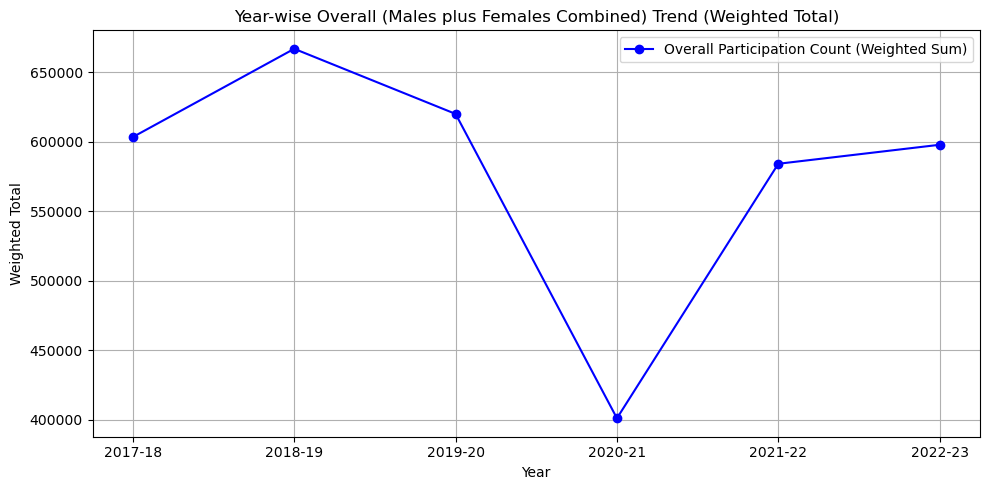

,Year,Total_Count
0,2017-18,603500.582549
1,2018-19,667019.150227
2,2019-20,620144.844911
3,2020-21,401024.650092
4,2021-22,584242.337704
5,2022-23,597925.089151


In [74]:
als_overall_plot(datasets, years_als)

# Function 11: plot_weighted_gender_trend() for ALS

In [75]:
import matplotlib.pyplot as plt

# Function to create year-wise line plot for Male & Female trends
def als_genderwise_plot(male_datasets, female_datasets, years):
    male_sums = [df["weighted_total"].sum() for df in male_datasets]
    female_sums = [df["weighted_total"].sum() for df in female_datasets]

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(years, male_sums, marker='o', linestyle='-', label="Male (Weighted Sum)", color='blue')
    plt.plot(years, female_sums, marker='o', linestyle='-', label="Female (Weighted Sum)", color='red')

    plt.xlabel("Year")
    plt.ylabel("Weighted Total")
    plt.title("Year-wise Male & Female Trend (Weighted Total)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return pd.DataFrame({
        "Year": years,
        "Total_Male": male_sums,
        "Total_Female": female_sums
    })


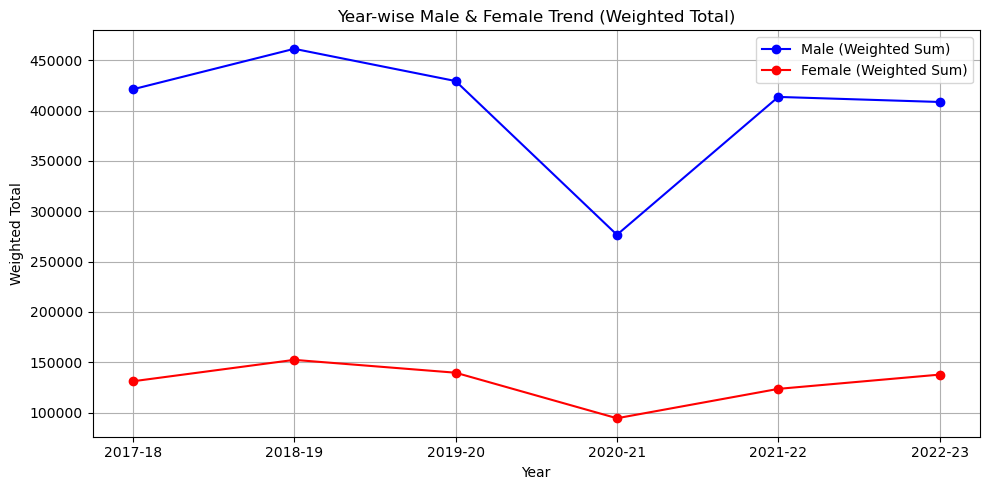

,Year,Total_Male,Total_Female
0,2017-18,421189.506323,131164.577913
1,2018-19,461418.838216,152442.385922
2,2019-20,429403.122846,139686.932545
3,2020-21,276682.820827,94451.330040
4,2021-22,413625.528471,123635.849298
5,2022-23,408603.791150,137795.938864


In [76]:
als_genderwise_plot(male_datasets, female_datasets, years_als)

# Function 12: Total RFU y-o-y participation

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

def rfu_overall_plot(dfs, years, title="Total Participation (Male + Female) Over Years"):
    """
    Plots total (male + female) participation per year.

    Parameters:
    dfs (list of pd.DataFrame): List of yearly DataFrames.
    years (list): Corresponding year labels.
    title (str): Plot title.
    """

    total_combined = []

    for df in dfs:
        male_cols = [col for col in df.columns if col.endswith('M')]
        female_cols = [col for col in df.columns if col.endswith('F')]

        male_total = df[male_cols].sum().sum()
        female_total = df[female_cols].sum().sum()
        total_combined.append(male_total + female_total)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(years, total_combined, marker='^', linestyle='--', color='purple', label='Total (M + F)')
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Total Participants")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return pd.DataFrame({
        "Year": years,
        "Total_Count": total_combined,
    })


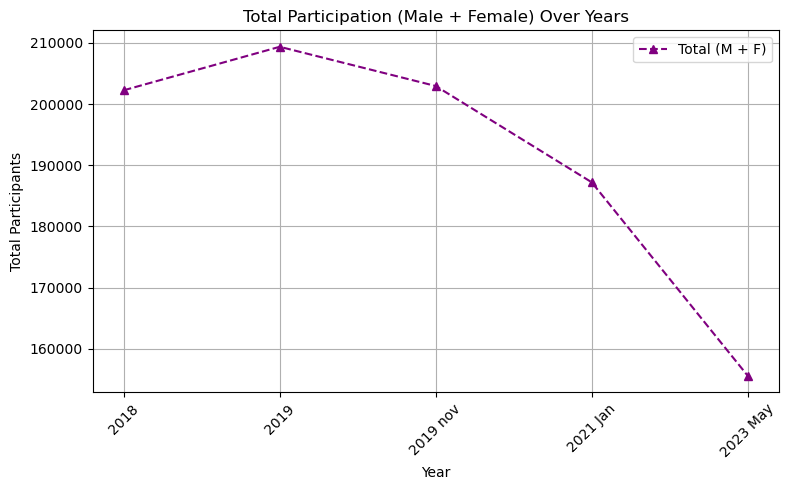

,Year,Total_Count
0,2018,202247
1,2019,209356
2,2019 nov,202945
3,2021 Jan,187212
4,2023 May,155596


In [78]:
rfu_overall_plot(dfs, years_rfu)

# Function 13: Genderwise yoy RFU participation

In [79]:
#copy
import matplotlib.pyplot as plt
import pandas as pd

def rfu_gender_plot(dfs, years, title="Year-wise Participation by Gender for RFU(U7-U17)"):

    total_males = []
    total_females = []

    for df in dfs:
        # Filter only columns ending with 'M' or 'F' and NOT starting with 'count_col'
        male_cols = [col for col in df.columns if col.endswith('M')]
        female_cols = [col for col in df.columns if col.endswith('F')]

        male_total = df[male_cols].sum().sum()                        
        female_total = df[female_cols].sum().sum()                    
       
        total_males.append(male_total)
        total_females.append(female_total)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(years, total_males, marker='o', label='Male')
    plt.plot(years, total_females, marker='s', label='Female')
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Total Participants")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Summary table
    return pd.DataFrame({
        "Year": years,
        "Total_Male": total_males,
        "Total_Female": total_females
    })


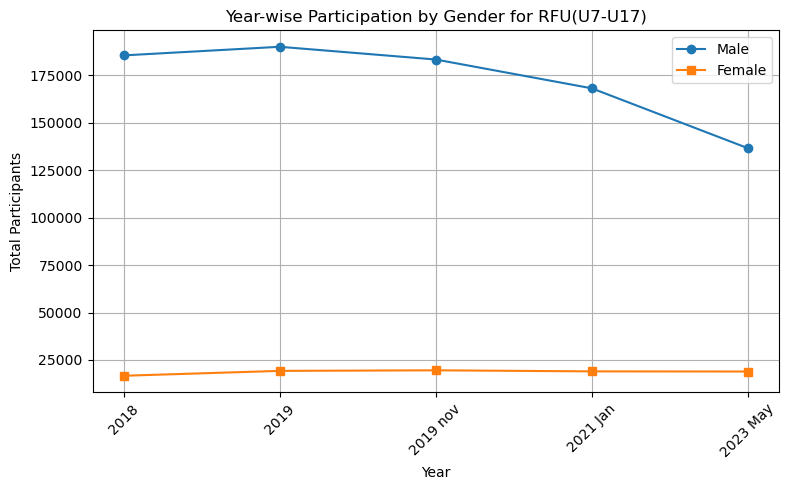

,Year,Total_Male,Total_Female
0,2018,185557,16690
1,2019,190094,19262
2,2019 nov,183382,19563
3,2021 Jan,168212,19000
4,2023 May,136671,18925


In [80]:
rfu_gender_plot(dfs, years_rfu)

# Function 14: group_by_columns()

In [81]:
import pandas as pd

def group_by_columns(df, years, groupby_cols, count_col):

    grouped_data = {}

    for df, year in zip(df, years):
        grouped_df = df.groupby(groupby_cols)[count_col].sum()
        grouped_data[year] = grouped_df.copy()  # Ensure a copy is stored
    df_1=pd.DataFrame(grouped_data)
    return df_1


In [82]:
'''
Implementing Function 10
'''
weighted_column="weighted_total"
regionwise_males=group_by_columns(male_datasets, years_als, groupby_cols=['Region','CSP'], count_col=weighted_column)
regionwise_females=group_by_columns(female_datasets, years_als, groupby_cols=['Region','CSP'], count_col=weighted_column)
regionwise_overall=group_by_columns(datasets, years_als, groupby_cols=['Region','CSP'], count_col=weighted_column)

In [83]:
males_regionwise_rfu=group_by_columns(dfs, years_rfu, groupby_cols=['Constituent Body'], count_col="count_col_m")
females_regionwise_rfu=group_by_columns(dfs, years_rfu, groupby_cols=['Constituent Body'], count_col="count_col_f")
overall_regionwise_rfu=group_by_columns(dfs, years_rfu, groupby_cols=['Constituent Body'], count_col="count_col")

## Removing counties containing zero values

In [84]:
overall_regionwise_rfu_nonzero_filtered = overall_regionwise_rfu[(overall_regionwise_rfu != 0).all(axis=1)]
overall_regionwise_rfu_zero_filtered= overall_regionwise_rfu[(overall_regionwise_rfu == 0).all(axis=1)]

males_regionwise_rfu_nonzero_filtered = males_regionwise_rfu[(males_regionwise_rfu != 0).any(axis=1)]
males_regionwise_rfu_zero_filtered=males_regionwise_rfu[(males_regionwise_rfu == 0).any(axis=1)]

females_regionwise_rfu_nonzero_filtered = females_regionwise_rfu[(females_regionwise_rfu != 0).any(axis=1)]
females_regionwise_rfu_zero_filtered= females_regionwise_rfu[(females_regionwise_rfu == 0).any(axis=1)]

In [85]:
for year, df in zip(years_als, datasets):
    total = df['weighted_total'].sum()
    print(f"Dataset {year}: {total:,.2f}")

for year, df in zip(years_als, male_datasets):
    total = df['weighted_total'].sum()
    print(f"Dataset {year} (Male): {total:,.2f}")

for year, df in zip(years_als, female_datasets):
    total = df['weighted_total'].sum()
    print(f"Dataset {year} (Female): {total:,.2f}")


Dataset 2017-18: 603,500.58
Dataset 2018-19: 667,019.15
Dataset 2019-20: 620,144.84
Dataset 2020-21: 401,024.65
Dataset 2021-22: 584,242.34
Dataset 2022-23: 597,925.09
Dataset 2017-18 (Male): 421,189.51
Dataset 2018-19 (Male): 461,418.84
Dataset 2019-20 (Male): 429,403.12
Dataset 2020-21 (Male): 276,682.82
Dataset 2021-22 (Male): 413,625.53
Dataset 2022-23 (Male): 408,603.79
Dataset 2017-18 (Female): 131,164.58
Dataset 2018-19 (Female): 152,442.39
Dataset 2019-20 (Female): 139,686.93
Dataset 2020-21 (Female): 94,451.33
Dataset 2021-22 (Female): 123,635.85
Dataset 2022-23 (Female): 137,795.94


# Function 15: Plots for various modes for ALS and RFU

In [86]:
#DONE CODE
import matplotlib.pyplot as plt

def plot_category_trends(df, top_n=5, mode="largest", first_col=None, last_col=None,
                         xlabel="Year", ylabel="Participation Count", title="Participation Trends"):

    """
    Plots year-wise trends for the top OR bottom N categories based on selected analysis modes.
    Modes supported: largest, most_improved_custom, least_improved_custom,
                     cagr, lowest_cagr, recovery, weakest_recovery

    Parameters:
    df (DataFrame): Rows = categories, Columns = time points.
    top_n (int): Top N categories to plot.
    mode (str): Analysis mode.
    first_col (str): Starting year/column name.
    last_col (str): Ending year/column name.
    xlabel (str), ylabel (str), title (str): Plot labels.

    Returns:
    DataFrame: Selected categories and their summary values.
    """

    if mode == "largest":
        selected_categories = df.sum(axis=1).nlargest(top_n)
        title = f"Top {top_n} {title}"

    elif mode == "smallest":
        selected_categories = df.sum(axis=1).nsmallest(top_n)
        title = f"Top {top_n} {title}"

    elif mode == "most_improved_custom":
        improvement = df[last_col] - df[first_col]
        selected_categories = improvement.nlargest(top_n)
        title = f"Most Improved {top_n} {title}"

    elif mode == "least_improved_custom":
        improvement = df[last_col] - df[first_col]
        selected_categories = improvement.nsmallest(top_n)
        title = f"Least Improved {top_n} {title}"

    elif mode == "percent_growth":
        percent_growth = ((df[last_col] - df[first_col]) / df[first_col]) * 100
        selected_categories = percent_growth.nlargest(top_n)
        title = f"Top {top_n} Percent Growth {title}"
        
    elif mode == "percent_fall":
        percent_growth = ((df[last_col] - df[first_col]) / df[first_col]) * 100
        selected_categories = percent_growth.nsmallest(top_n)
        title = f"Top {top_n} Percent Fall {title}"

    elif mode == "recovery":
        middle_cols = df.loc[:, first_col:last_col].iloc[:, 1:-1].columns
        min_dip = df[middle_cols].min(axis=1)
        recovery_strength = df[last_col] - min_dip
        selected_categories = recovery_strength.nlargest(top_n)
        title = f"Top {top_n} Recovery after Dip {title}"

    elif mode == "weakest_recovery":
        middle_cols = df.loc[:, first_col:last_col].iloc[:, 1:-1].columns
        min_dip = df[middle_cols].min(axis=1)
        recovery_strength = df[last_col] - min_dip
        selected_categories = recovery_strength.nsmallest(top_n)
        title = f"Weakest {top_n} Recovery after Dip {title}"

    # ✅ Plot
    for category in selected_categories.index:
        plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)

        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.xticks(rotation=45)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize="small")
        plt.grid(True)

    return selected_categories.to_frame(name='Summary Value')


# Overall ALS Plots

In [87]:


'''
modes = [
    "largest", "smallest", "most_improved_custom", "least_improved_custom", "cagr",
    "lowest_cagr", "recovery", "weakest_recovery"
]
'''

'\nmodes = [\n    "largest", "smallest", "most_improved_custom", "least_improved_custom", "cagr",\n    "lowest_cagr", "recovery", "weakest_recovery"\n]\n'

In [88]:
first_col="2017-18"
last_col='2022-23'

,,Summary Value
Region,CSP,
London,London,428622.250903
North West,Greater Manchester,165367.784170
East,Greater Essex,160772.957761
Yorkshire and the Humber,West and South Yorkshire,127726.475540
South East,Hampshire and Isle of Wight,121211.095351


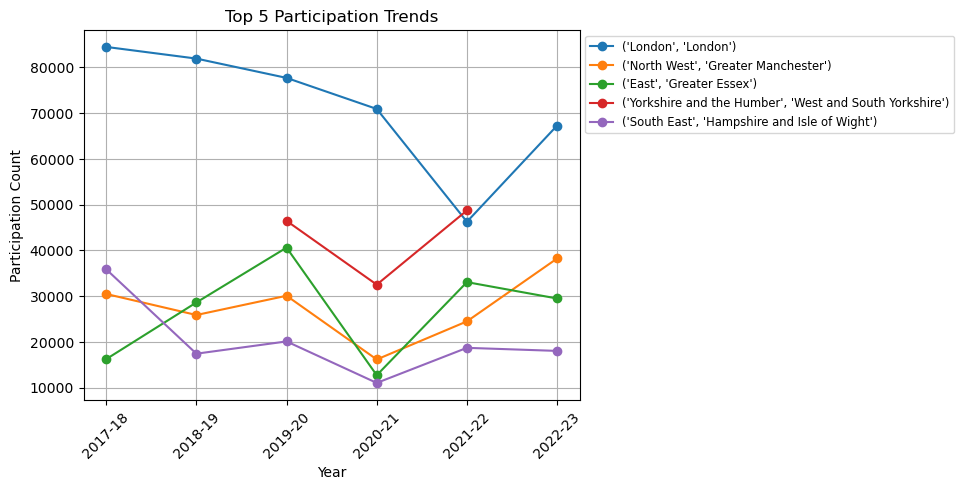

In [90]:
plot_category_trends(regionwise_overall, first_col="2017-18",last_col='2022-23',mode='largest')

Summary Value
Region        CSP                           
North East    Northumberland     6617.691339
              Durham            11227.644799
East Midlands Derbyshire        15032.305474
              Nottinghamshire   20306.689982
North East    Rise North East   20427.946048

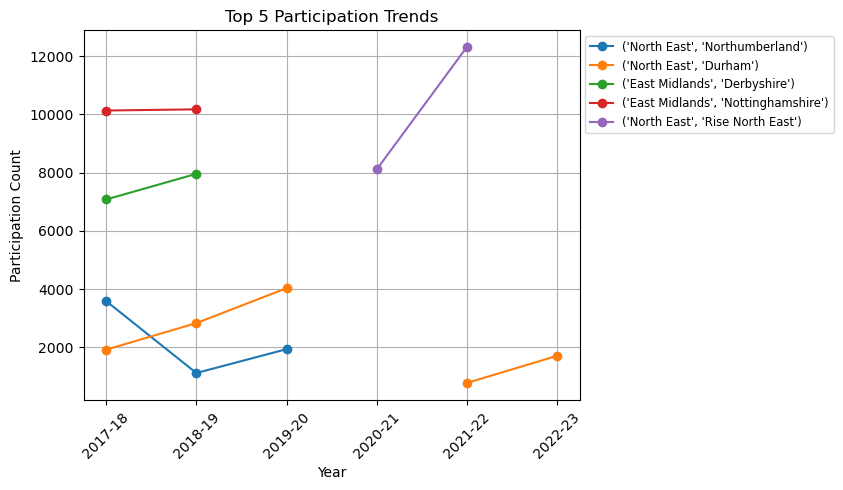

In [91]:
plot_category_trends(regionwise_overall, first_col="2017-18",last_col='2022-23',mode='smallest')

,,Summary Value
Region,CSP,
West Midlands,Black Country,17288.234258
South West,Wiltshire & Swindon,13275.351247
East,Greater Essex,13258.021929
West Midlands,Shropshire and Telford and the Wrekin,10222.521900
South East,Surrey,9138.232150


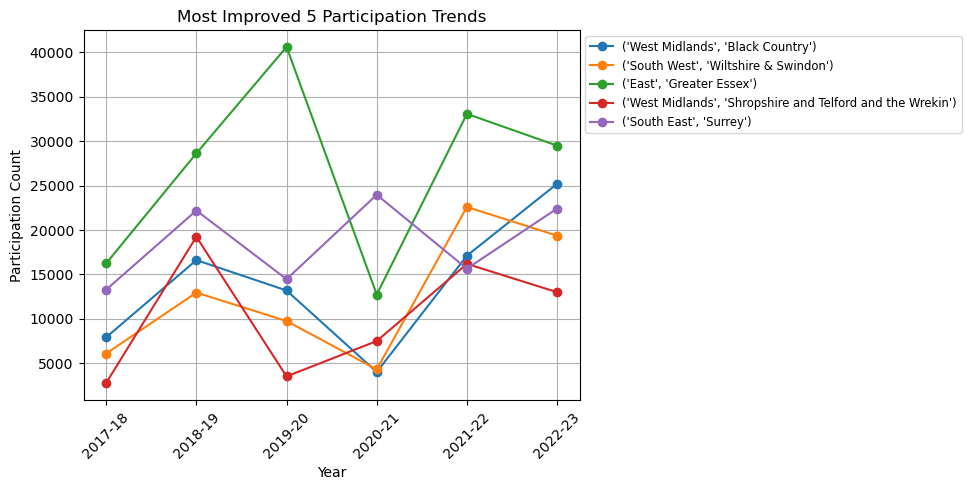

In [92]:
plot_category_trends(regionwise_overall, first_col="2017-18",last_col='2022-23',mode='most_improved_custom')

,,Summary Value
Region,CSP,
South East,Hampshire and Isle of Wight,-17837.273966
London,London,-17190.380087
West Midlands,"Coventry, Solihull & Warwickshire",-14228.653251
North West,Cheshire,-10320.199462
South East,Sussex,-9854.865787


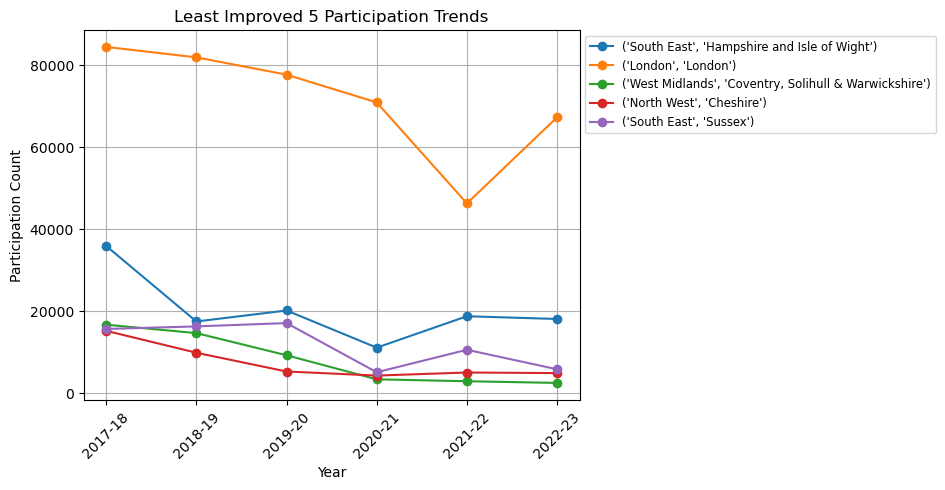

In [93]:
plot_category_trends(regionwise_overall, first_col="2017-18",last_col='2022-23', mode='least_improved_custom')

Summary Value
Region        CSP                                                 
West Midlands Shropshire and Telford and the Wrekin     369.485564
              Black Country                             218.634641
South West    Wiltshire & Swindon                       218.324871
              Bristol and West of England               109.071576
East          Greater Essex                              81.647676

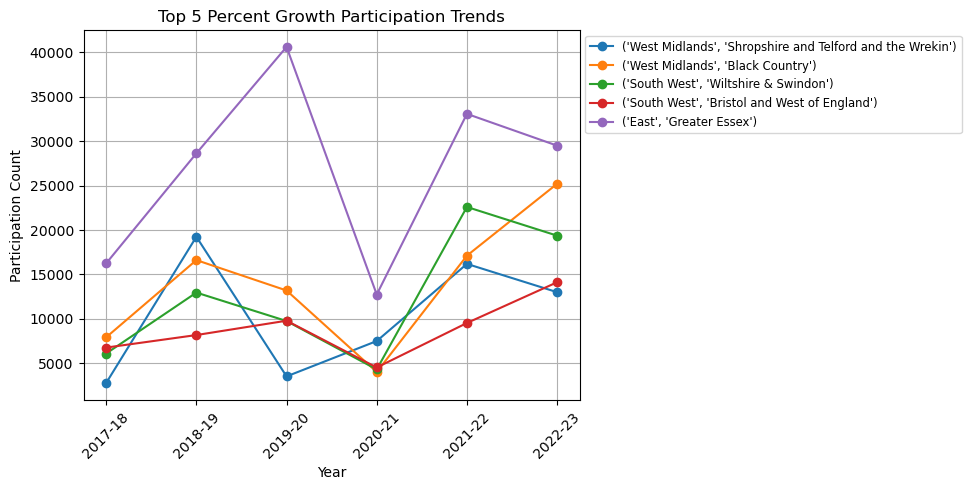

In [94]:
plot_category_trends(regionwise_overall,  first_col="2017-18",last_col='2022-23',  mode='percent_growth')

Summary Value
Region        CSP                                             
West Midlands Coventry, Solihull & Warwickshire     -85.440063
              Birmingham                            -77.721132
North West    Cheshire                              -68.132779
South East    Sussex                                -63.138169
West Midlands Staffordshire and Stoke-on-Trent      -60.749269

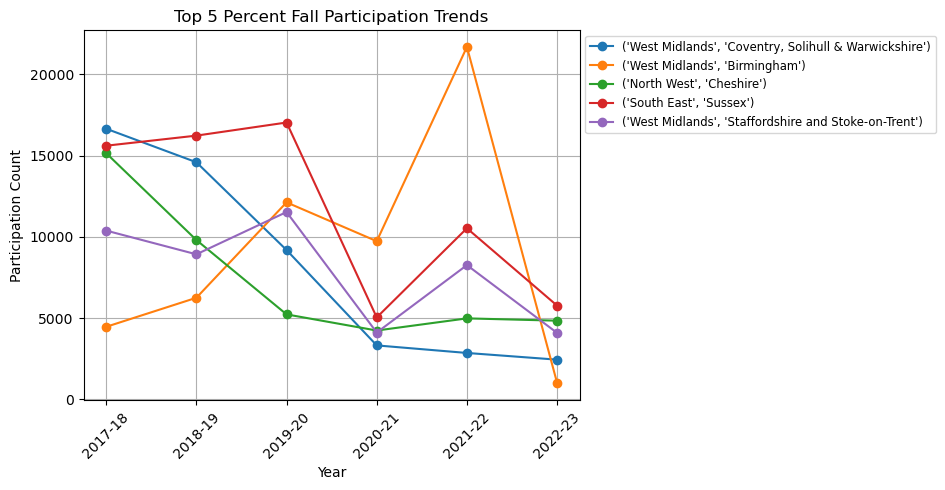

In [95]:
plot_category_trends(regionwise_overall,  first_col="2017-18",last_col='2022-23',  mode='percent_fall')

# Overall RFU Plots

,Summary Value
Constituent Body,
Surrey Rugby (CB),83314
Yorkshire RFU (CB),63723
Kent County Rugby Football Union Limited (CB),56397
North Midlands RFU (CB),48091
Gloucestershire RFU (CB),45620


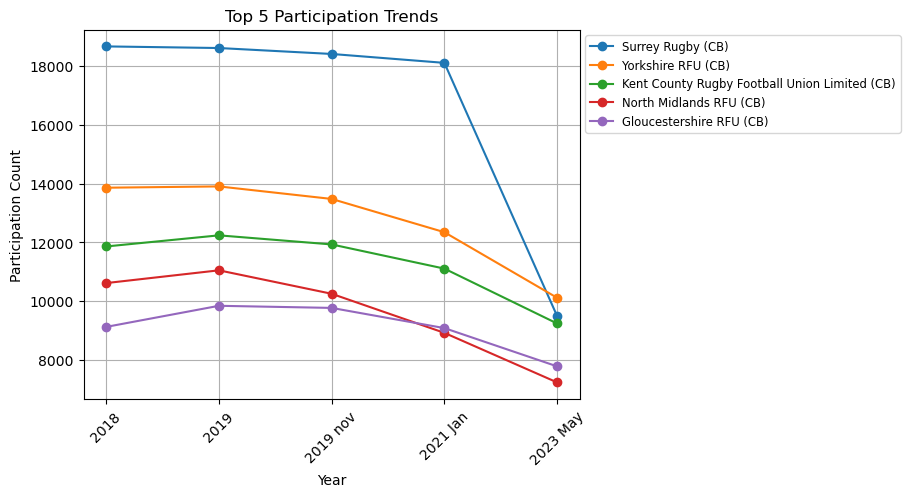

In [96]:
plot_category_trends(overall_regionwise_rfu_nonzero_filtered, first_col='2018', last_col='2023 May', mode='largest')

,Summary Value
Constituent Body,
Royal Navy Rugby Union,2093
Cumbria RFU Ltd. (CB),11732
Berkshire County RFU (CB),16065
Northumberland Rugby Union (CB),17615
Staffordshire County RFU (CB),18036
Oxfordshire RFU (CB),18376
Buckinghamshire County RFU (CB),18707
Cornwall RFU (CB),19658


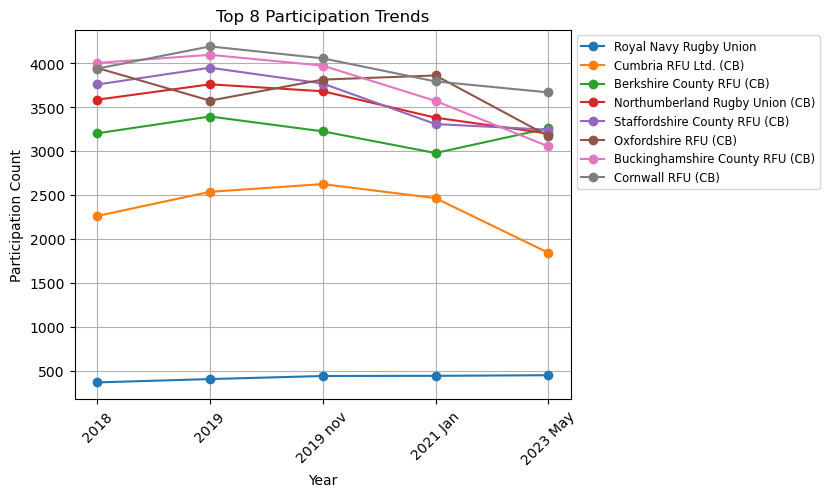

In [97]:
plot_category_trends(overall_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='smallest')

,Summary Value
Constituent Body,
Devon RFU (CB),352
Royal Navy Rugby Union,82
Berkshire County RFU (CB),57
Cornwall RFU (CB),-271
"Notts, Lincs & Derbyshire RFU (CB)",-368


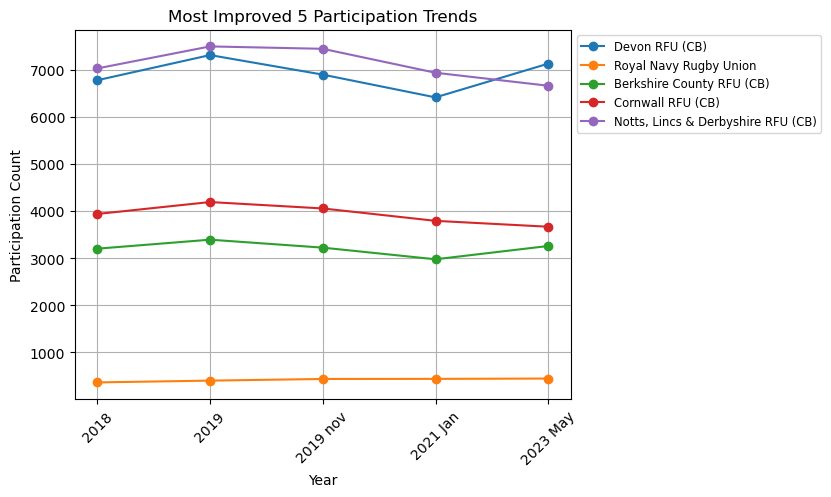

In [98]:
plot_category_trends(overall_regionwise_rfu_nonzero_filtered, first_col='2018', last_col='2023 May', mode='most_improved_custom')

,Summary Value
Constituent Body,
Surrey Rugby (CB),-9174
Yorkshire RFU (CB),-3745
Hertfordshire RFU (CB),-3393
North Midlands RFU (CB),-3380
Eastern Counties Rugby Union (CB),-2985
Middlesex County RFU (CB),-2877
Kent County Rugby Football Union Limited (CB),-2621
Lancashire County RFU (CB),-1838


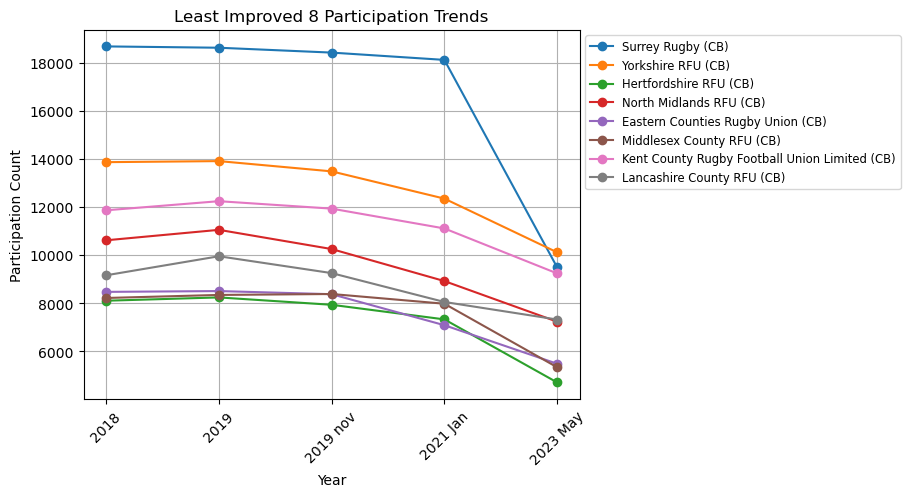

In [99]:
plot_category_trends(overall_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='least_improved_custom')

,Summary Value
Constituent Body,
Royal Navy Rugby Union,22.465753
Devon RFU (CB),5.191740
Berkshire County RFU (CB),1.779026
"Notts, Lincs & Derbyshire RFU (CB)",-5.233964
Cornwall RFU (CB),-6.876427


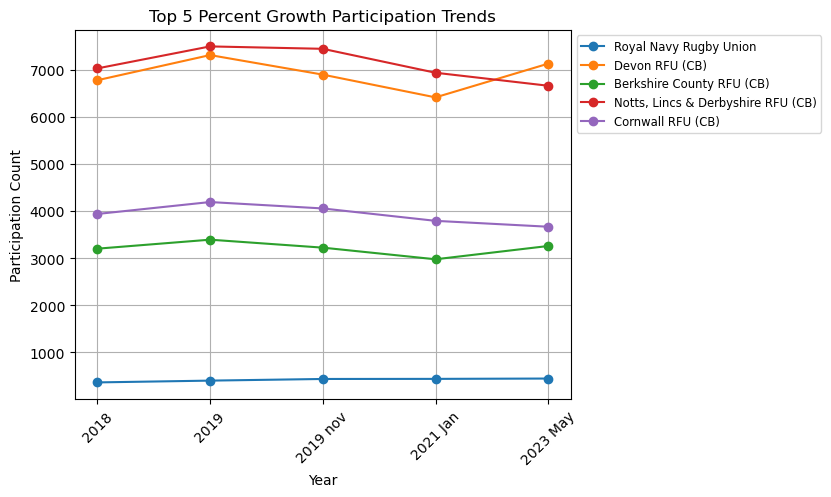

In [100]:
plot_category_trends(overall_regionwise_rfu_nonzero_filtered, first_col='2018', last_col='2023 May', mode='percent_growth')

,Summary Value
Constituent Body,
Surrey Rugby (CB),-49.132391
Hertfordshire RFU (CB),-41.842397
Eastern Counties Rugby Union (CB),-35.217084
Middlesex County RFU (CB),-34.987231
North Midlands RFU (CB),-31.829739
Sussex RFU Ltd. (CB),-27.023642
Yorkshire RFU (CB),-27.012406
Buckinghamshire County RFU (CB),-23.739391


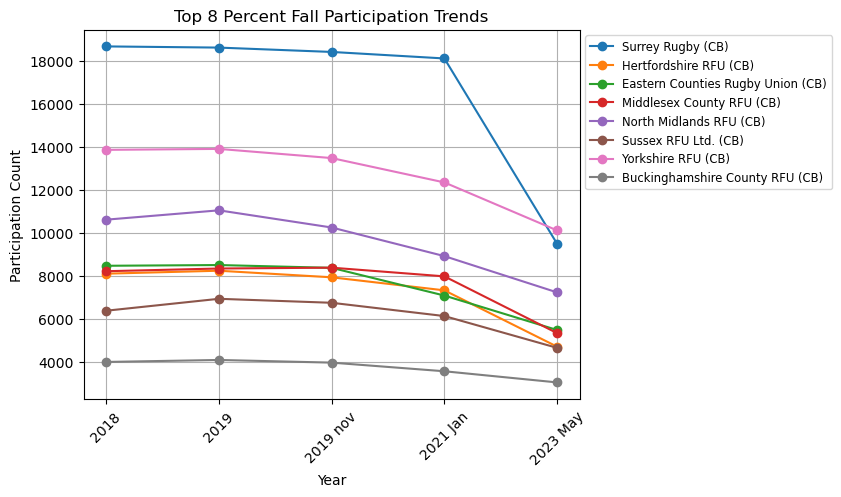

In [101]:
plot_category_trends(overall_regionwise_rfu_nonzero_filtered, top_n=8,  first_col='2018', last_col='2023 May', mode='percent_fall')

# ALS Plots (Males)

In [102]:
first_col="2017-18"
last_col='2022-23'

'''
modes = [
    "largest", "smallest", "most_improved_custom", "least_improved_custom", "cagr",
    "lowest_cagr", "recovery", "weakest_/'recovery"
]
'''

'\nmodes = [\n    "largest", "smallest", "most_improved_custom", "least_improved_custom", "cagr",\n    "lowest_cagr", "recovery", "weakest_/\'recovery"\n]\n'

,,Summary Value
Region,CSP,
London,London,283568.839470
East,Greater Essex,118417.116907
North West,Greater Manchester,111061.205125
Yorkshire and the Humber,West and South Yorkshire,87113.183363
South East,Hampshire and Isle of Wight,83738.990715


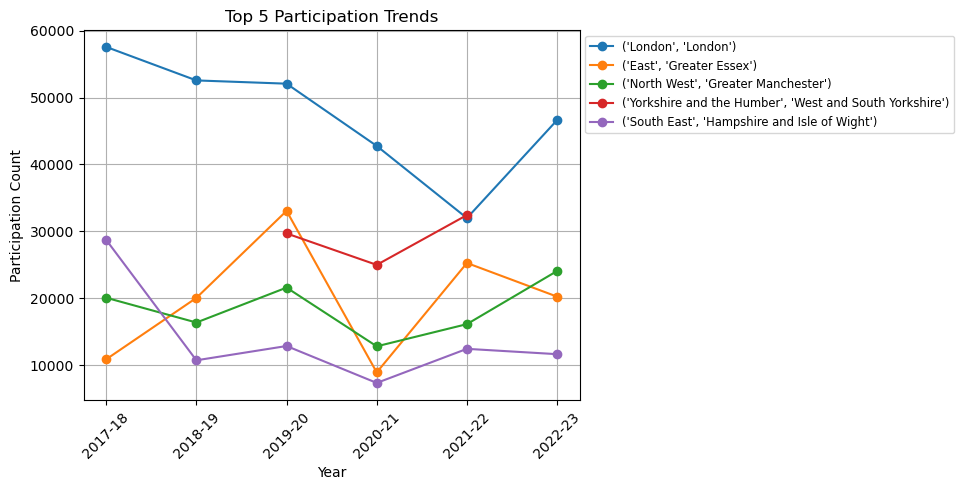

In [103]:
plot_category_trends(regionwise_males,  first_col="2017-18",last_col='2022-23',  mode='largest')

Summary Value
Region                   CSP                           
North East               Northumberland     4219.751687
                         Durham             8074.485800
East Midlands            Derbyshire        10511.357490
Yorkshire and the Humber South Yorkshire   13275.112868
East Midlands            Nottinghamshire   14481.652733

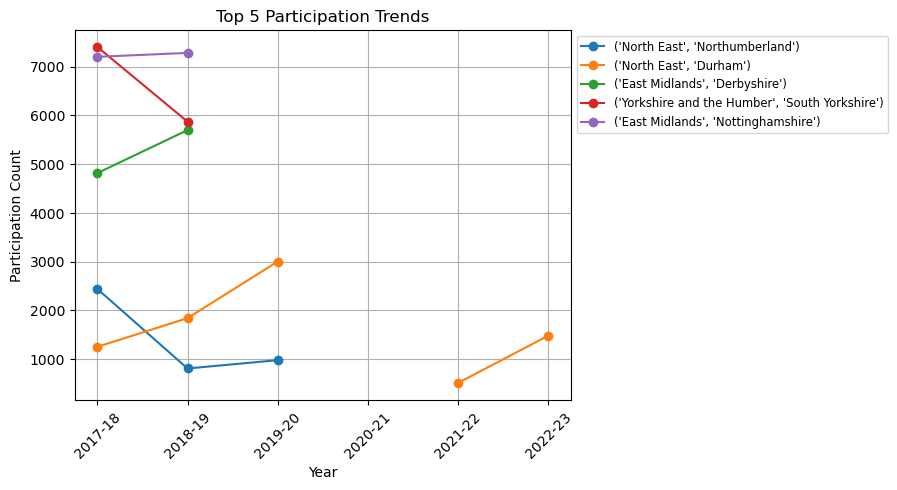

In [104]:
plot_category_trends(regionwise_males, first_col="2017-18",last_col='2022-23', mode='smallest')

,,Summary Value
Region,CSP,
West Midlands,Black Country,11534.359198
South West,Wiltshire & Swindon,11309.825272
East,Greater Essex,9366.198872
South East,Surrey,8380.100269
East,Bedfordshire & Luton,6502.881030


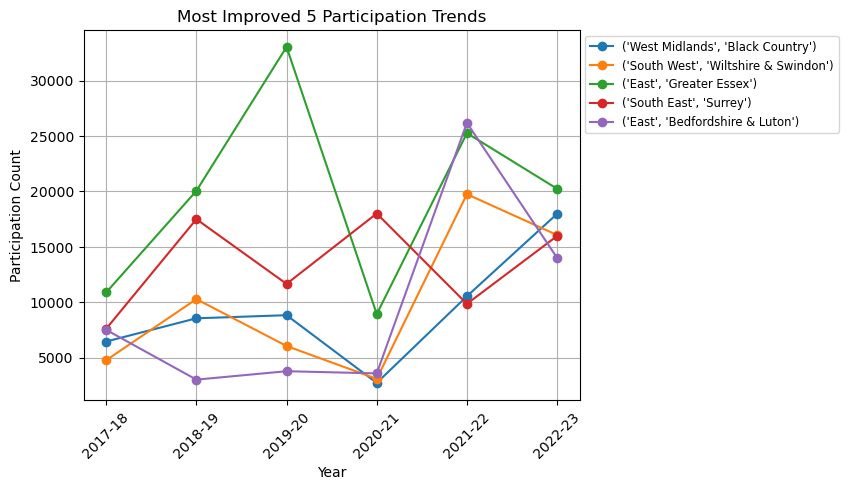

In [105]:
plot_category_trends(regionwise_males,first_col="2017-18",last_col='2022-23', mode='most_improved_custom')

,,Summary Value
Region,CSP,
South East,Hampshire and Isle of Wight,-17080.171367
London,London,-10936.535593
West Midlands,"Coventry, Solihull & Warwickshire",-9489.355873
North West,Cheshire,-8664.012583
South West,Gloucestershire,-6974.398669


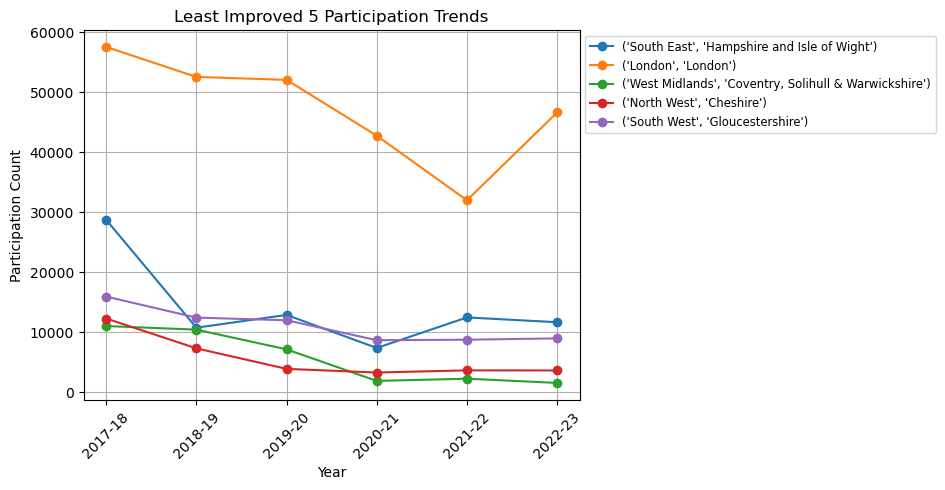

In [106]:
plot_category_trends(regionwise_males,first_col="2017-18",last_col='2022-23', mode='least_improved_custom')

,,Summary Value
Region,CSP,
West Midlands,Shropshire and Telford and the Wrekin,304.290340
South West,Wiltshire & Swindon,237.850117
West Midlands,Black Country,178.982837
South East,Surrey,110.284301
South West,Bristol and West of England,94.047238


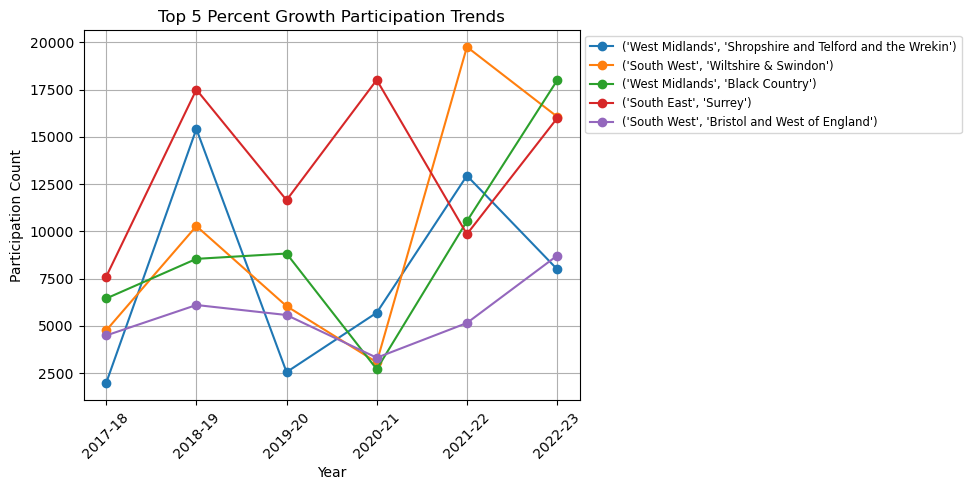

In [107]:
plot_category_trends(regionwise_males,first_col="2017-18",last_col='2022-23', mode='percent_growth')

Summary Value
Region        CSP                                             
West Midlands Coventry, Solihull & Warwickshire     -86.215396
              Birmingham                            -81.104231
North West    Cheshire                              -70.651413
West Midlands Staffordshire and Stoke-on-Trent      -66.509216
East          Suffolk                               -65.960359

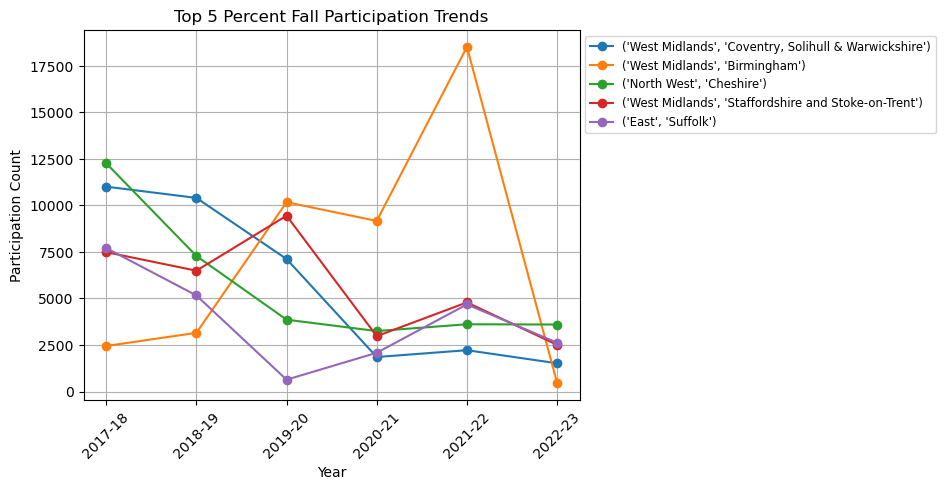

In [108]:
plot_category_trends(regionwise_males,first_col="2017-18",last_col='2022-23', mode='percent_fall')

# RFU Plots (Males)

In [109]:
'''
modes = [
    "largest", "smallest", "most_improved_custom", "least_improved_custom", "percent_growth",
    "percent_fall"
]
'''

'\nmodes = [\n    "largest", "smallest", "most_improved_custom", "least_improved_custom", "percent_growth",\n    "percent_fall"\n]\n'

,Summary Value
Constituent Body,
Surrey Rugby (CB),76626
Yorkshire RFU (CB),56179
Kent County Rugby Football Union Limited (CB),51194
North Midlands RFU (CB),43483
Gloucestershire RFU (CB),40772


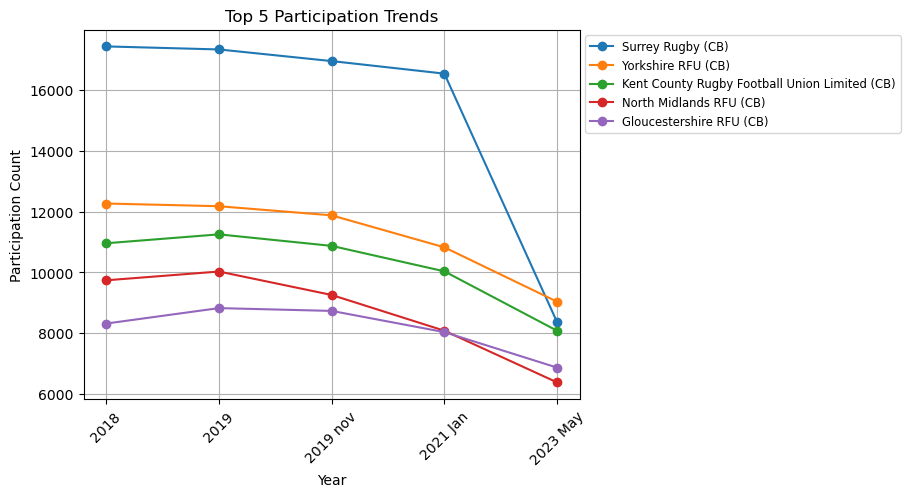

In [110]:
plot_category_trends(males_regionwise_rfu_nonzero_filtered,  first_col='2018', last_col='2023 May', mode='largest')

,Summary Value
Constituent Body,
Students' Rugby Football Union (CB),4
Army Rugby Union (CB),564
Royal Navy Rugby Union,1864
Cumbria RFU Ltd. (CB),10342
Berkshire County RFU (CB),14725
Northumberland Rugby Union (CB),15605
Staffordshire County RFU (CB),15700
Buckinghamshire County RFU (CB),16914


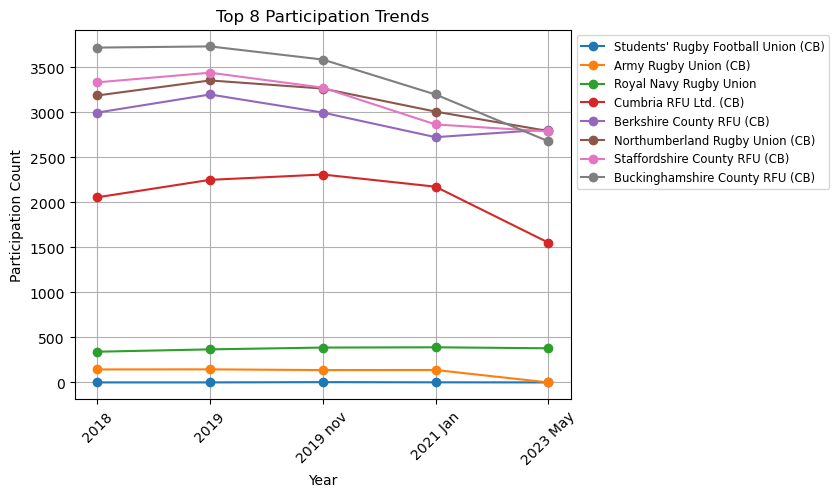

In [111]:
plot_category_trends(males_regionwise_rfu_nonzero_filtered, top_n=8,  first_col='2018', last_col='2023 May', mode='smallest')

,Summary Value
Constituent Body,
Royal Navy Rugby Union,38
Devon RFU (CB),19
Students' Rugby Football Union (CB),0
Army Rugby Union (CB),-144
Berkshire County RFU (CB),-188
Northumberland Rugby Union (CB),-395
Cornwall RFU (CB),-446
Cumbria RFU Ltd. (CB),-503


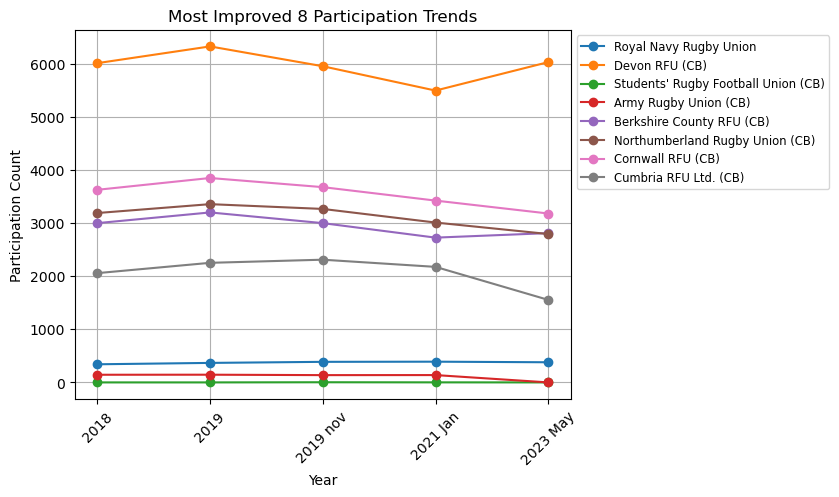

In [112]:
plot_category_trends(males_regionwise_rfu_nonzero_filtered, top_n=8,  first_col='2018', last_col='2023 May', mode='most_improved_custom')

,Summary Value
Constituent Body,
Surrey Rugby (CB),-9075
Hertfordshire RFU (CB),-3462
North Midlands RFU (CB),-3360
Yorkshire RFU (CB),-3231
Eastern Counties Rugby Union (CB),-3054
Middlesex County RFU (CB),-2938
Kent County Rugby Football Union Limited (CB),-2879
Essex County RFU (CB),-1916


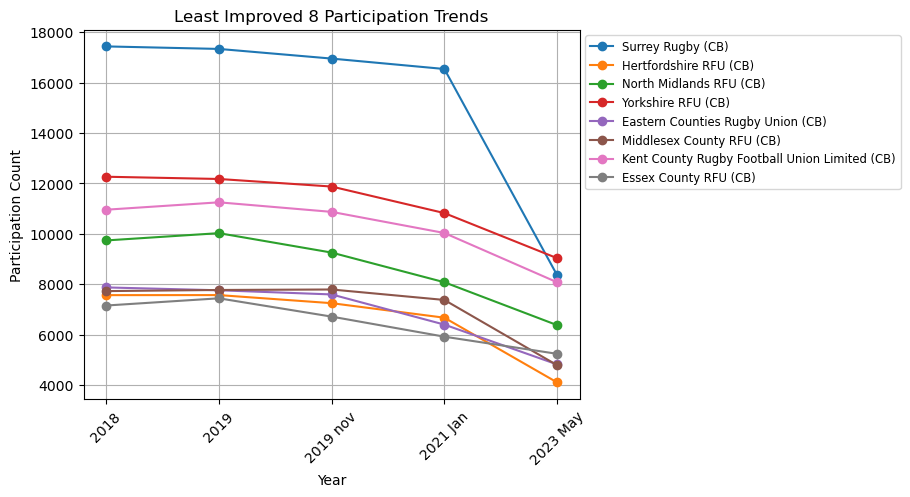

In [113]:
plot_category_trends(males_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='least_improved_custom')

,Summary Value
Constituent Body,
Royal Navy Rugby Union,11.143695
Devon RFU (CB),0.316298
Berkshire County RFU (CB),-6.272940
"Notts, Lincs & Derbyshire RFU (CB)",-8.277579
Cornwall RFU (CB),-12.306843


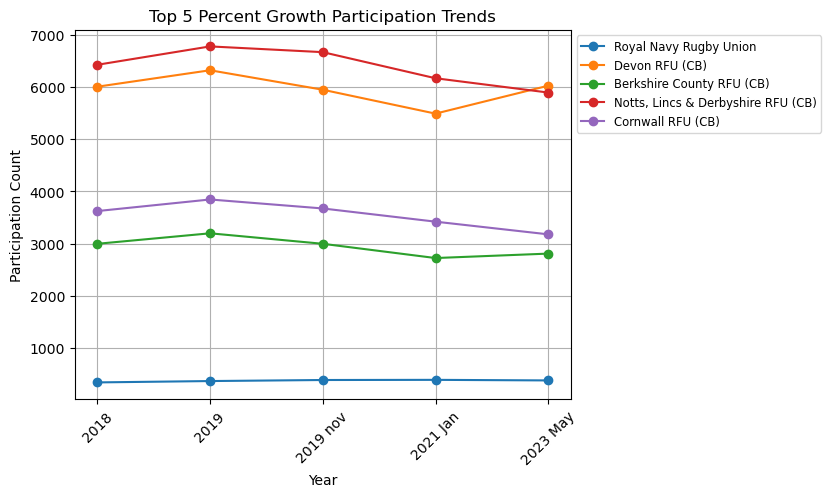

In [114]:
plot_category_trends(males_regionwise_rfu_nonzero_filtered, first_col='2018', last_col='2023 May', mode='percent_growth')

,Summary Value
Constituent Body,
Army Rugby Union (CB),-100.000000
Surrey Rugby (CB),-52.047488
Hertfordshire RFU (CB),-45.739199
Eastern Counties Rugby Union (CB),-38.780952
Middlesex County RFU (CB),-38.012680
North Midlands RFU (CB),-34.500462
Sussex RFU Ltd. (CB),-32.483427
Buckinghamshire County RFU (CB),-27.964507


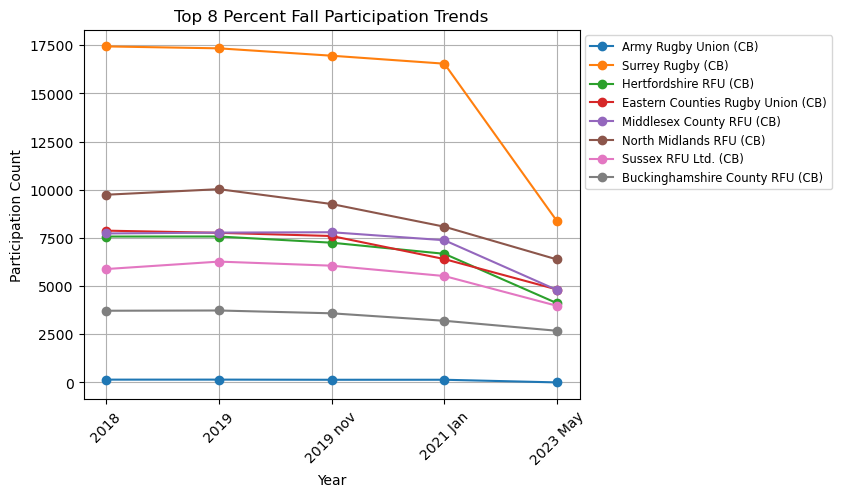

In [115]:
plot_category_trends(males_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='percent_fall')

# ALS Plots (Females)

In [ ]:
plot_category_trends(regionwise_females,  first_col="2017-18",last_col='2022-23',  mode='largest')

In [ ]:
plot_category_trends(regionwise_females,  first_col="2017-18",last_col='2022-23',  mode='smallest')

In [ ]:
plot_category_trends(regionwise_females,  first_col="2017-18",last_col='2022-23',  mode='most_improved_custom')

In [ ]:
plot_category_trends(regionwise_females,  first_col="2017-18",last_col='2022-23',  mode='least_improved_custom')

In [ ]:
plot_category_trends(regionwise_females,  first_col="2017-18",last_col='2022-23',  mode='percent_growth')

In [ ]:
plot_category_trends(regionwise_females,  first_col="2017-18",last_col='2022-23',  mode='percent_fall')

# RFU Plots (Females)

In [ ]:
plot_category_trends(females_regionwise_rfu_nonzero_filtered, first_col='2018', last_col='2023 May', mode='largest')

In [ ]:
plot_category_trends(females_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='smallest')

In [ ]:
plot_category_trends(females_regionwise_rfu_nonzero_filtered, top_n=8,first_col='2018', last_col='2023 May', mode='most_improved_custom')

In [ ]:
plot_category_trends(females_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='least_improved_custom')

In [ ]:
plot_category_trends(females_regionwise_rfu_nonzero_filtered,top_n=8, first_col='2018', last_col='2023 May', mode='percent_growth')

In [ ]:
plot_category_trends(females_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='percent_fall')

# Age-ALS-Overall

In [116]:
datasets = [df_2017_18, df_2018_19, df_2019_20, df_2020_21, df_2021_22, df_2022_23]
years = ["2017-18", "2018-19", "2019-20", "2020-21", "2021-22", "2022-23"]

In [117]:
agew_over=group_by_columns(datasets, years, groupby_cols=['Age'], count_col=sport_column)

,Summary Value
Age,
12.0,8261.0
11.0,7678.0
13.0,7177.0
10.0,6482.0
9.0,5595.0


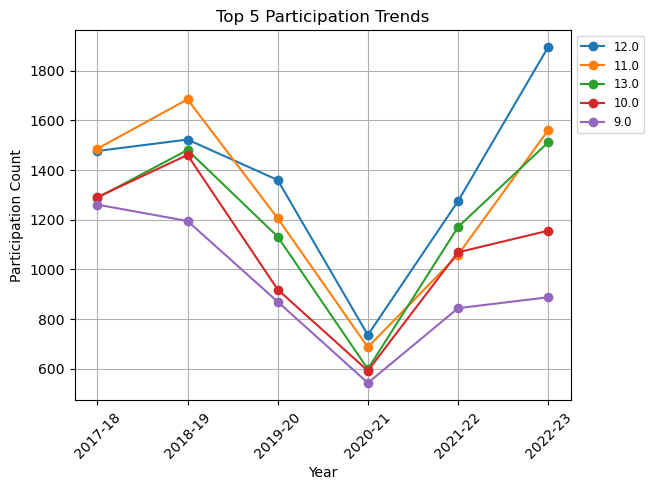

In [118]:
plot_category_trends(agew_over)

In [119]:
agew_over=group_by_columns(male_datasets, years, groupby_cols=['Age'], count_col=sport_column)

,Summary Value
Age,
12.0,5818.0
11.0,5153.0
13.0,4914.0
10.0,4186.0
14.0,3676.0


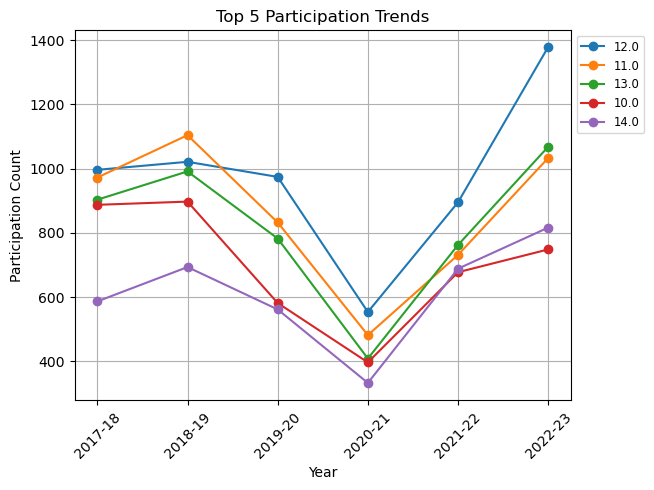

In [120]:
plot_category_trends(agew_over)

In [121]:
agew_over=group_by_columns(female_datasets, years, groupby_cols=['Age'], count_col=sport_column)

,Summary Value
Age,
12.0,2151.0
11.0,2068.0
10.0,1936.0
13.0,1927.0
9.0,1610.0


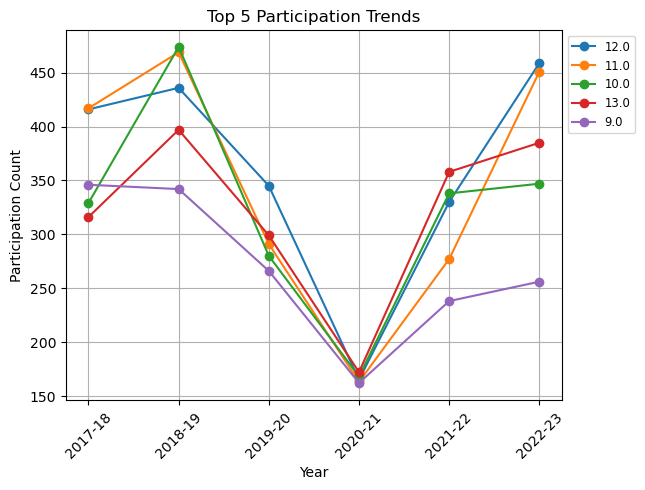

In [122]:
plot_category_trends(agew_over)

# Age-RFU-Overall

In [130]:
age_columns_rfu = ['U7M', 'U7F', 'U8M', 'U8F', 'U9M', 'U9F', 'U10M', 'U10F',
                   'U11M', 'U11F', 'U12M', 'U12F', 'U13M', 'U13F', 'U14M', 'U14F',
                   'U15M', 'U15F', 'U16M', 'U16F', 'U17M','U17F']

In [139]:
import pandas as pd 
import matplotlib.pyplot as plt

def analyze_top5_overall_age_groups(dfs, years, age_columns):
    overall_trend = {}

    for df, year in zip(dfs, years):
        overall_totals = df[age_columns].sum(axis=0)
        overall_trend[year] = overall_totals

    overall_df = pd.DataFrame(overall_trend).T
    top_5_overall = overall_df.sum().sort_values(ascending=False).head(5)

    # Plot
    plt.figure(figsize=(10, 6))
    for col in top_5_overall.index:
        plt.plot(overall_df.index, overall_df[col], marker='o', label=col)
    plt.title("Top 5 Overall Age Groups by Participation (Year-on-Year)")
    plt.xlabel("Year")
    plt.ylabel("Participants")
    plt.legend(title="Age Group")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Return top 5 with total count
    return top_5_overall.reset_index().rename(columns={'index': 'Age Group', 0: 'Total Participants'})


def analyze_top5_male_age_groups(dfs, years, age_columns):
    male_cols = [col for col in age_columns if col.endswith('M')]
    male_trend = {}

    for df, year in zip(dfs, years):
        male_totals = df[male_cols].sum(axis=0)
        male_trend[year] = male_totals

    male_df = pd.DataFrame(male_trend).T
    top_5_males = male_df.sum().sort_values(ascending=False).head(5)

    # Plot
    plt.figure(figsize=(10, 6))
    for col in top_5_males.index:
        plt.plot(male_df.index, male_df[col], marker='o', label=col)
    plt.title("Top 5 Male Age Groups by Participation (Year-on-Year)")
    plt.xlabel("Year")
    plt.ylabel("Participants")
    plt.legend(title="Age Group")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return top_5_males.reset_index().rename(columns={'index': 'Age Group', 0: 'Total Participants'})


def analyze_top5_female_age_groups(dfs, years, age_columns):
    female_cols = [col for col in age_columns if col.endswith('F')]
    female_trend = {}

    for df, year in zip(dfs, years):
        female_totals = df[female_cols].sum(axis=0)
        female_trend[year] = female_totals

    female_df = pd.DataFrame(female_trend).T
    top_5_females = female_df.sum().sort_values(ascending=False).head(5)

    # Plot
    plt.figure(figsize=(10, 6))
    for col in top_5_females.index:
        plt.plot(female_df.index, female_df[col], marker='o', label=col)
    plt.title("Top 5 Female Age Groups by Participation (Year-on-Year)")
    plt.xlabel("Year")
    plt.ylabel("Participants")
    plt.legend(title="Age Group")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return top_5_females.reset_index().rename(columns={'index': 'Age Group', 0: 'Total Participants'})



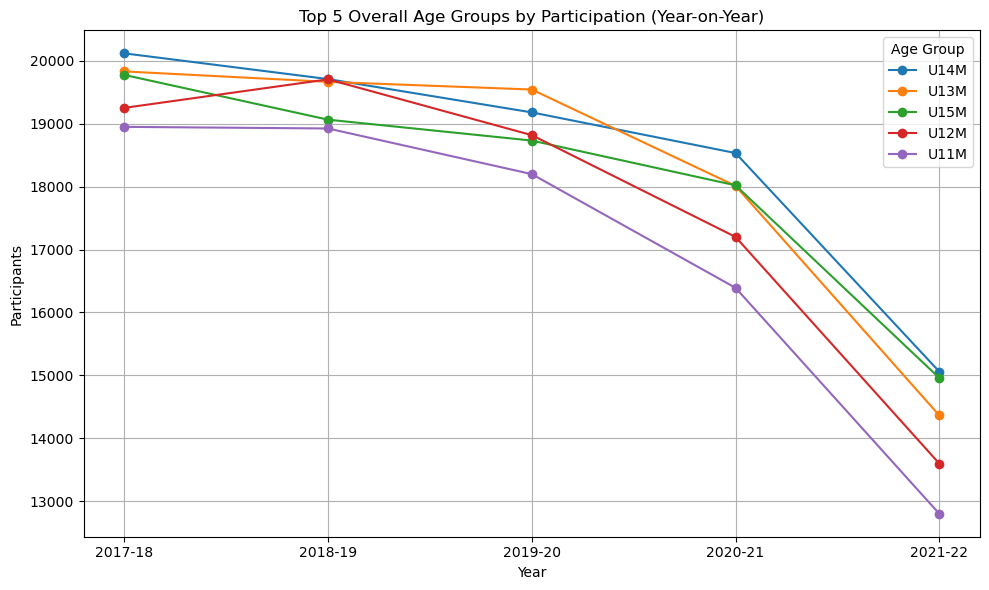

,Age Group,Total Participants
0,U14M,92597
1,U13M,91412
2,U15M,90547
3,U12M,88571
4,U11M,85263


In [141]:
analyze_top5_overall_age_groups(dfs, years, age_columns_rfu)

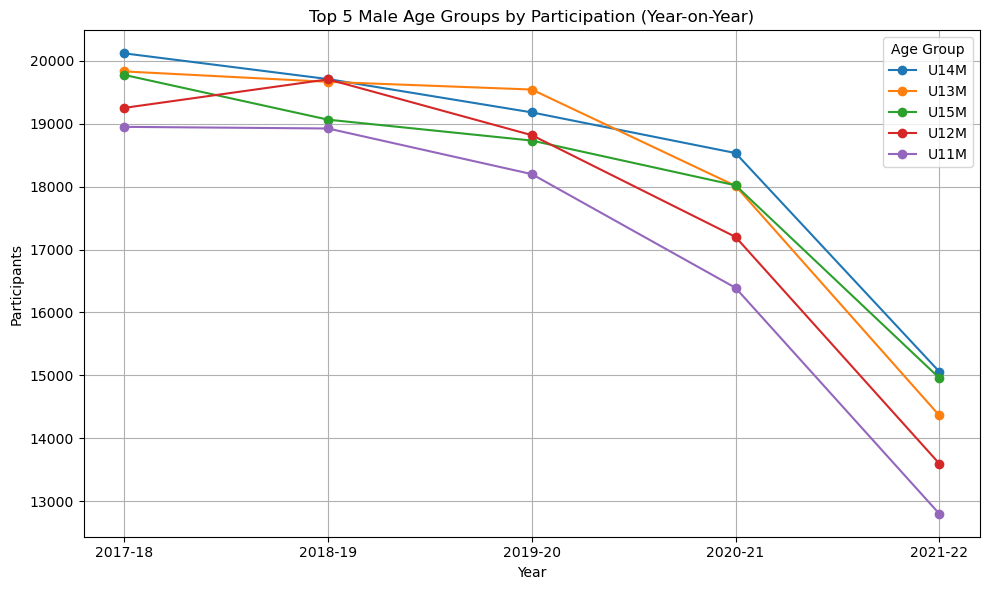

,Age Group,Total Participants
0,U14M,92597
1,U13M,91412
2,U15M,90547
3,U12M,88571
4,U11M,85263


In [142]:
analyze_top5_male_age_groups(dfs, years, age_columns_rfu)

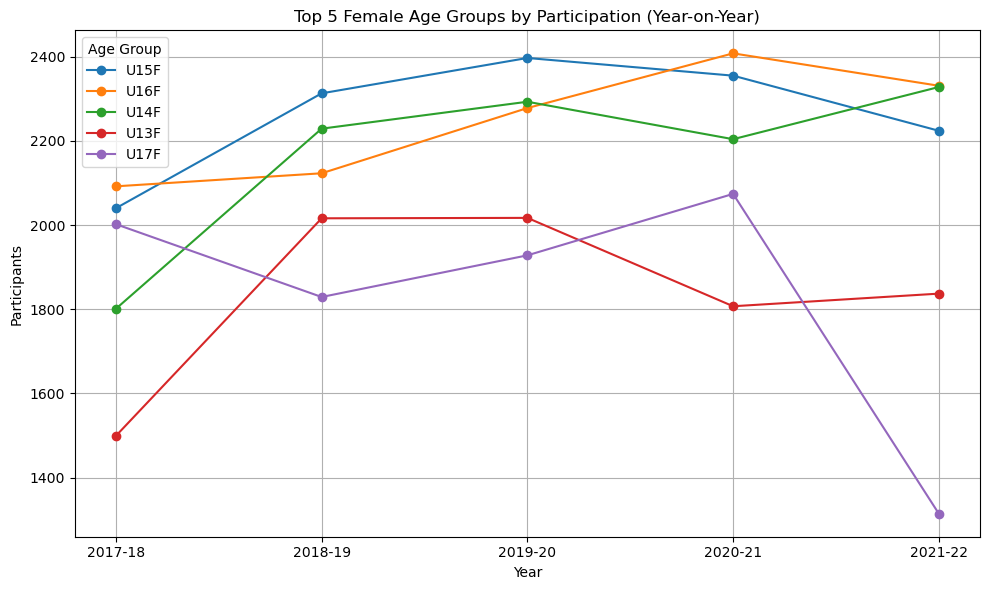

,Age Group,Total Participants
0,U15F,11329
1,U16F,11232
2,U14F,10855
3,U13F,9176
4,U17F,9147


In [143]:
analyze_top5_female_age_groups(dfs, years, age_columns_rfu)